# Vanisree P G


## Task-2

# car price prediction model

## 1. DATA UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### About columns:

Car_ID : Unique id of each column
    
Symboling : Its assigned insurance risk rating, A value of +3 - Indicates that the auto is risky, -3 that it is probably pretty safe.
carCompany : Name of car company
    
fueltype : Car fuel type i.e gas or diesel (
    
doornumber : Number of doors in a car 
    
carbody : body of car 
   
drivewheel : type of drive wheel 
    
enginelocation : Location of car engine 
    
wheelbase : Weelbase of car 
    
carlength : Length of car 
    
carwidth : Width of car 
   
carheight : height of car 
    
curbweight : The weight of a car without occupants or baggage. 
    
enginetype : Type of engine. 
   
cylindernumber : Number of cylinder placed in the car 
    
enginesize : Size of engine 
    
fuelsystem : Fuel system of car 
    
boreratio : Boreratio of car 
    
stroke : Stroke or volume inside the engine 
    
compressionratio : compression ratio of car
    
horsepower : Horsepower 
    
peakrpm : car peak rpm
    
citympg : Mileage in city
    
highwaympg : Mileage on highway 
    
price(Dependent variable) : Price of car

In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


# 2. Data Cleaning

In [8]:
df.drop('car_ID',axis=1,inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

symboling           0
enginetype          0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
curbweight          0
CarName             0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
price               0
dtype: int64

Inference 

There is no null values in the data set

In [10]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
for i in df.columns:
  print(df[i].value_counts())
  print("________________________________________")

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
________________________________________
peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
mitsubishi g4               3
                           ..
buick skylark               1
buick century               1
subaru tribeca              1
subaru trezia               1
toyota corolla 1600 (sw)    1
Name: CarName, Length: 147, dtype: int64
________________________________________
gas       185
diesel     20
Name: fueltype, dtype: int64
________________________________________
std      168
turbo     37
Name: aspiration, dtype: int64
________________________________________
four    115
two      90
Name: doornumber, dtype: int64
________________________________________
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
________________________________________
fwd    120
r

<AxesSubplot:>

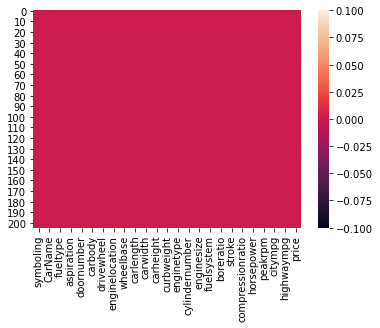

In [12]:
import seaborn as sns
sns.heatmap(df.isnull())

# 3.EDA

In [13]:
details=[ 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 
         'carheight','enginelocation','enginetype', 'cylindernumber','fuelsystem','enginesize','peakrpm', 'citympg', 
         'highwaympg','boreratio', 'stroke', 'compressionratio','horsepower']

gas       185
diesel     20
Name: fueltype, dtype: int64


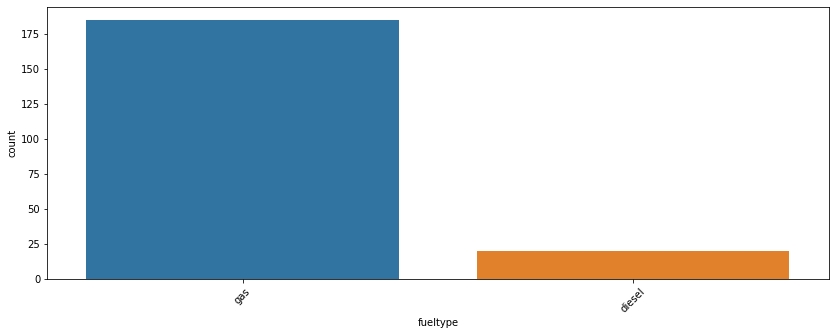

_________________________________________________________--
std      168
turbo     37
Name: aspiration, dtype: int64


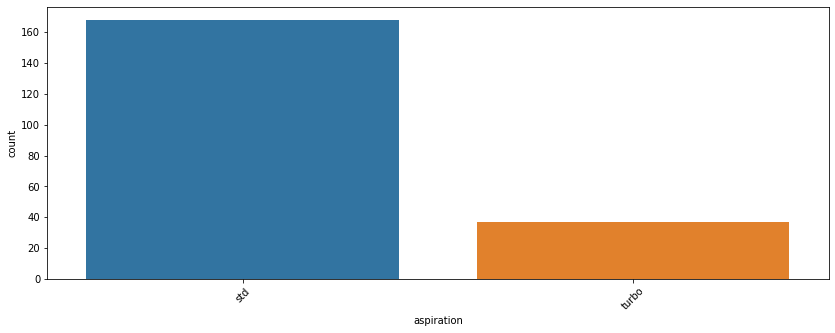

_________________________________________________________--
four    115
two      90
Name: doornumber, dtype: int64


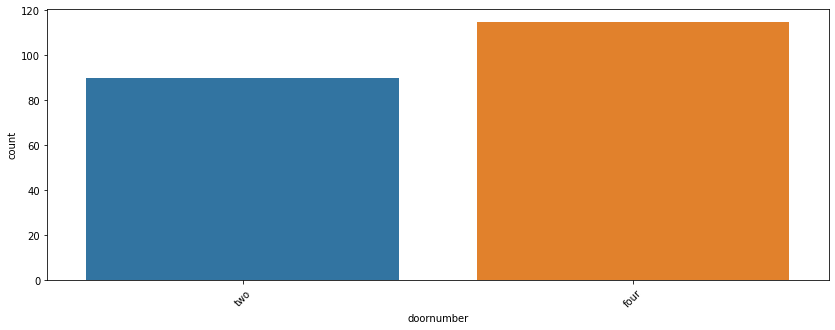

_________________________________________________________--
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


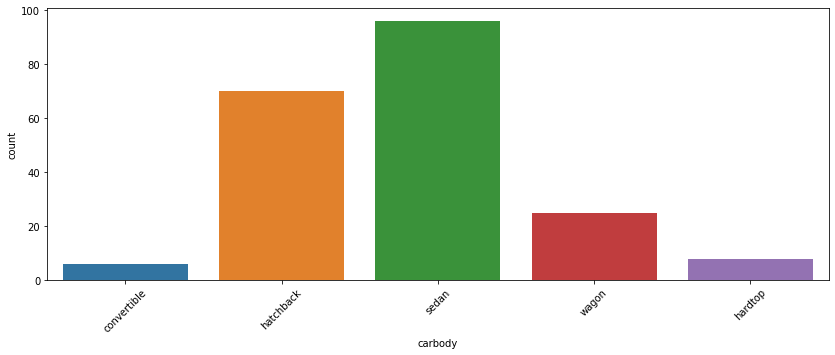

_________________________________________________________--
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


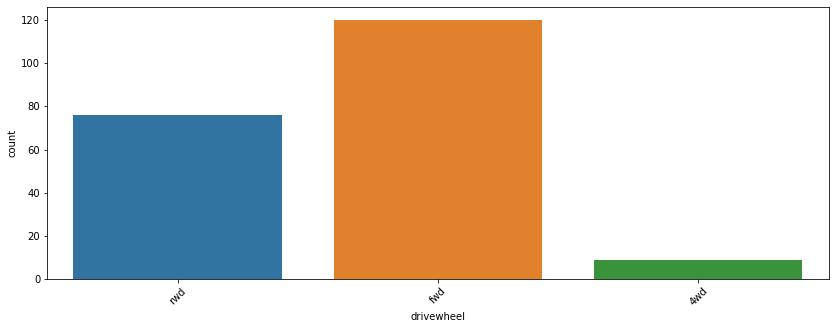

_________________________________________________________--
94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
104.3     6
96.3      6
98.8      6
107.9     6
100.4     6
99.1      6
93.1      5
95.9      5
102.4     5
109.1     5
97.2      5
101.2     4
97.0      4
114.2     4
95.3      4
89.5      3
105.8     3
110.0     3
103.5     3
104.5     2
103.3     2
104.9     2
102.9     2
91.3      2
115.6     2
99.8      2
113.0     2
96.9      2
86.6      2
96.1      2
88.6      2
112.0     1
93.3      1
95.1      1
102.7     1
93.0      1
102.0     1
99.4      1
99.5      1
94.3      1
99.2      1
96.6      1
106.7     1
120.9     1
88.4      1
108.0     1
96.0      1
Name: wheelbase, dtype: int64


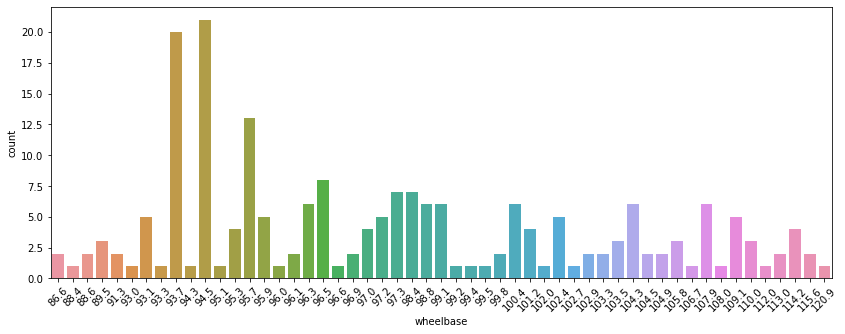

_________________________________________________________--
157.3    15
188.8    11
186.7     7
166.3     7
171.7     7
         ..
157.1     1
181.5     1
191.7     1
180.3     1
158.8     1
Name: carlength, Length: 75, dtype: int64


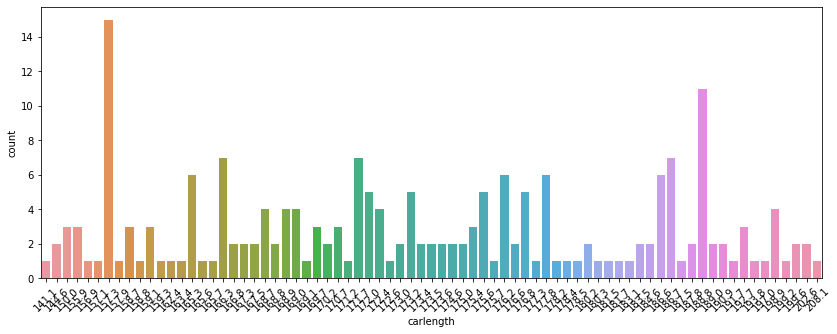

_________________________________________________________--
63.8    24
66.5    23
65.4    15
63.6    11
68.4    10
64.4    10
64.0     9
65.5     8
65.2     7
67.2     6
66.3     6
64.2     6
65.6     6
67.9     5
66.9     5
64.8     4
68.9     4
65.7     4
65.0     3
70.3     3
71.7     3
63.9     3
71.4     3
66.1     2
64.6     2
64.1     2
68.3     2
69.6     2
67.7     2
66.0     1
63.4     1
61.8     1
62.5     1
66.6     1
70.9     1
60.3     1
70.6     1
72.3     1
72.0     1
66.2     1
68.0     1
68.8     1
70.5     1
66.4     1
Name: carwidth, dtype: int64


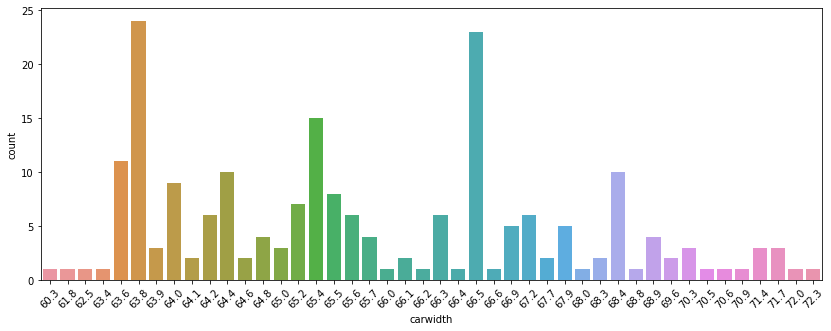

_________________________________________________________--
50.8    14
52.0    12
55.7    12
54.5    10
54.1    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
54.9     6
50.2     6
52.8     6
53.0     6
53.7     5
55.1     5
50.6     5
58.7     4
53.3     4
49.6     4
57.5     3
52.5     3
49.7     3
56.2     3
53.5     3
59.1     3
53.9     2
48.8     2
54.7     2
49.4     2
50.5     2
51.4     2
54.4     2
56.5     2
56.3     2
59.8     2
58.3     1
56.0     1
55.4     1
55.6     1
52.4     1
54.8     1
53.1     1
51.0     1
53.2     1
47.8     1
55.2     1
55.9     1
Name: carheight, dtype: int64


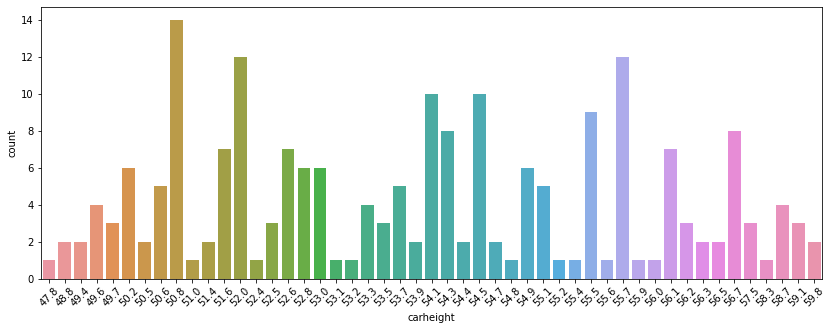

_________________________________________________________--
front    202
rear       3
Name: enginelocation, dtype: int64


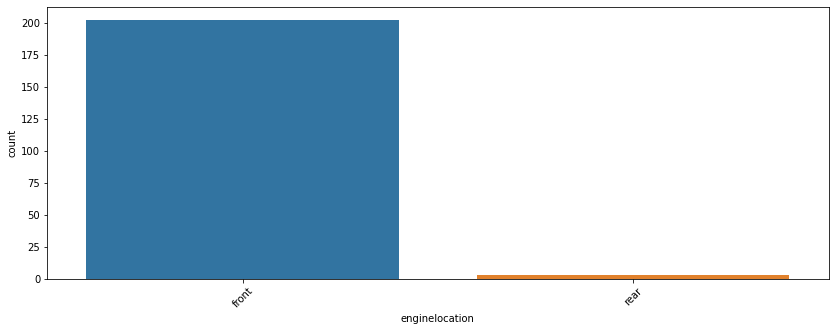

_________________________________________________________--
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


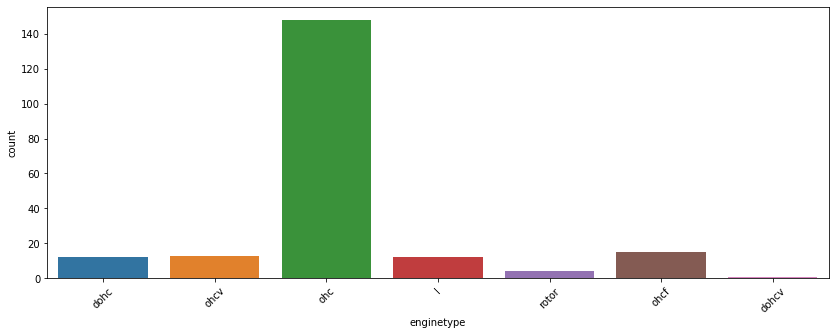

_________________________________________________________--
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


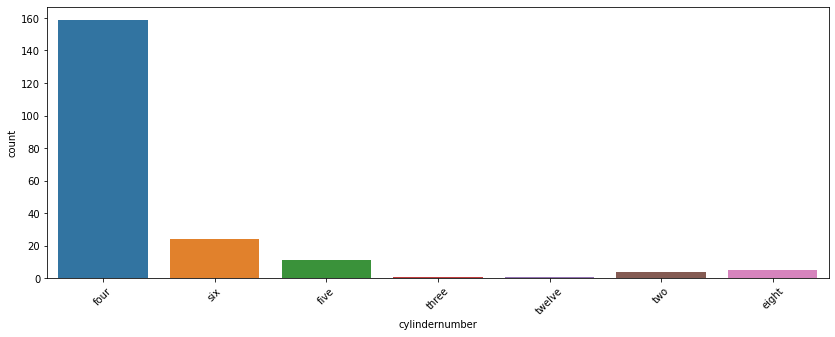

_________________________________________________________--
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


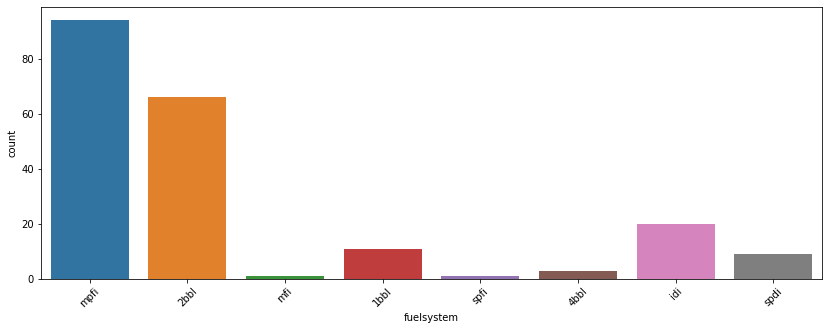

_________________________________________________________--
92     15
122    15
98     14
97     14
108    13
90     12
110    12
109     8
120     7
141     7
146     6
152     6
181     6
121     6
91      5
136     5
156     5
130     4
183     4
164     3
171     3
194     3
70      3
209     3
140     2
258     2
134     2
132     2
234     2
131     2
145     1
119     1
151     1
111     1
103     1
161     1
79      1
173     1
326     1
61      1
308     1
203     1
304     1
80      1
Name: enginesize, dtype: int64


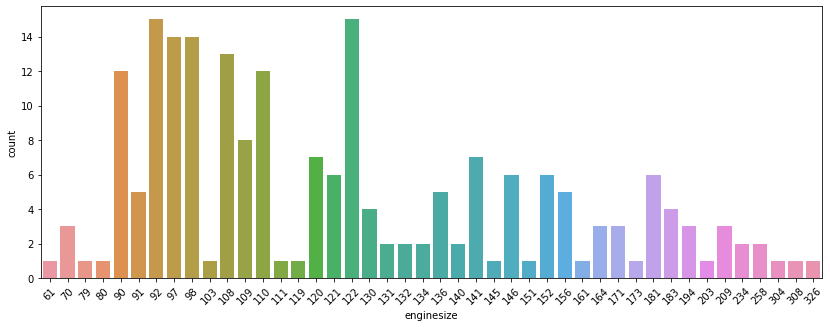

_________________________________________________________--
5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
5800     7
4500     7
5100     5
4150     5
4200     5
4750     4
4350     4
4250     3
4400     3
5900     3
6600     2
5750     1
5300     1
4650     1
5600     1
4900     1
Name: peakrpm, dtype: int64


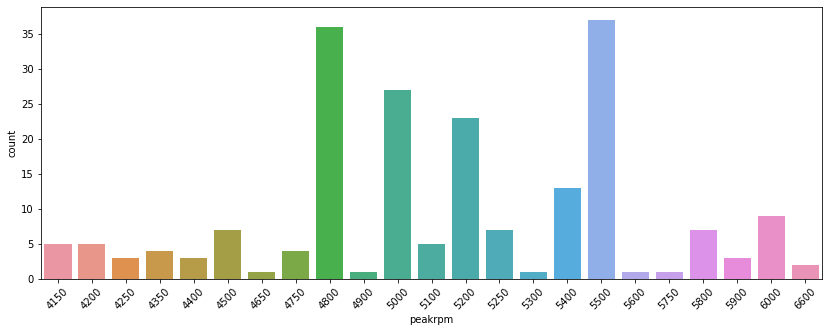

_________________________________________________________--
31    28
19    27
24    22
27    14
17    13
23    12
26    12
21     8
25     8
30     8
28     7
38     7
16     6
37     6
22     4
20     3
18     3
29     3
15     3
14     2
36     1
47     1
45     1
13     1
35     1
34     1
33     1
32     1
49     1
Name: citympg, dtype: int64


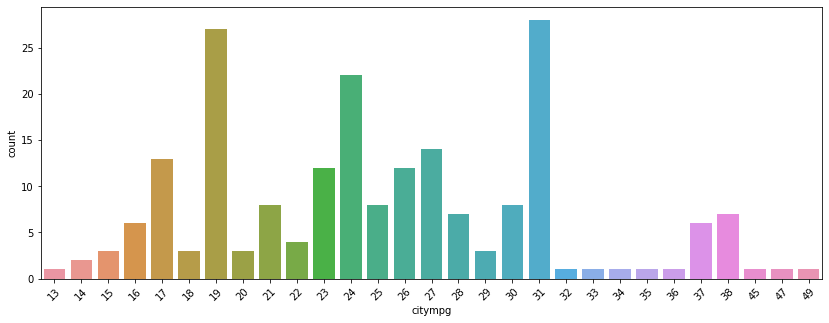

_________________________________________________________--
25    19
38    17
24    17
30    16
32    16
34    14
28    13
37    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
26     3
42     3
41     3
46     2
39     2
47     2
16     2
36     2
20     2
19     2
18     2
17     1
50     1
53     1
54     1
Name: highwaympg, dtype: int64


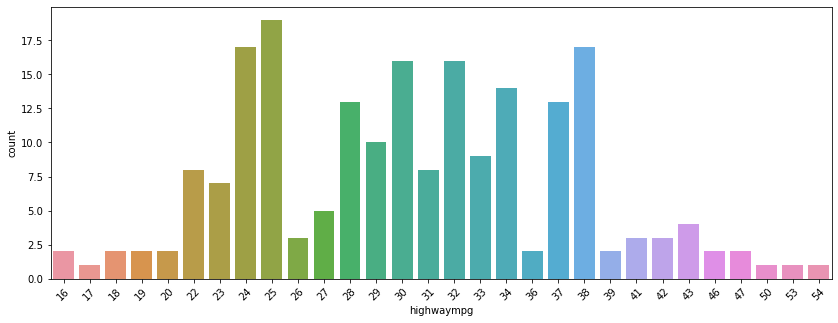

_________________________________________________________--
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.43     8
3.31     8
2.91     7
3.27     7
3.05     6
3.33     6
3.54     6
3.39     6
3.58     6
3.70     5
3.01     5
3.35     4
3.74     3
3.17     3
3.59     3
3.63     2
3.24     2
3.80     2
3.13     2
3.47     2
3.94     2
3.50     2
3.76     1
3.60     1
2.92     1
3.08     1
2.54     1
2.68     1
3.34     1
3.61     1
2.99     1
Name: boreratio, dtype: int64


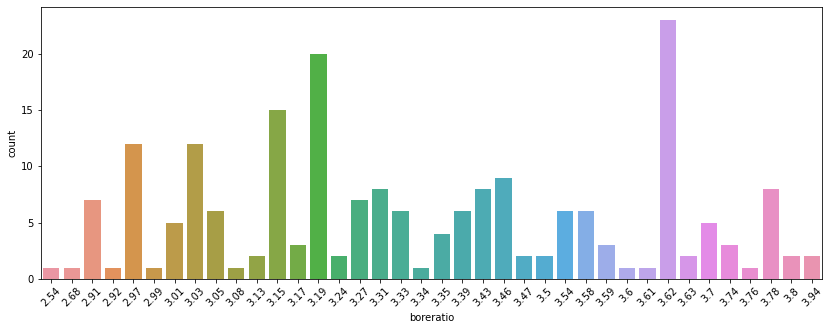

_________________________________________________________--
3.400    20
3.150    14
3.230    14
3.030    14
3.390    13
2.640    11
3.350     9
3.290     9
3.460     8
3.500     6
3.270     6
3.110     6
3.580     6
3.070     6
3.410     6
3.190     6
3.640     5
3.520     5
3.540     4
3.860     4
3.255     4
3.470     4
3.900     3
2.900     3
3.080     2
3.100     2
2.190     2
4.170     2
2.800     2
2.680     2
3.160     1
2.070     1
3.210     1
2.760     1
3.120     1
2.360     1
2.870     1
Name: stroke, dtype: int64


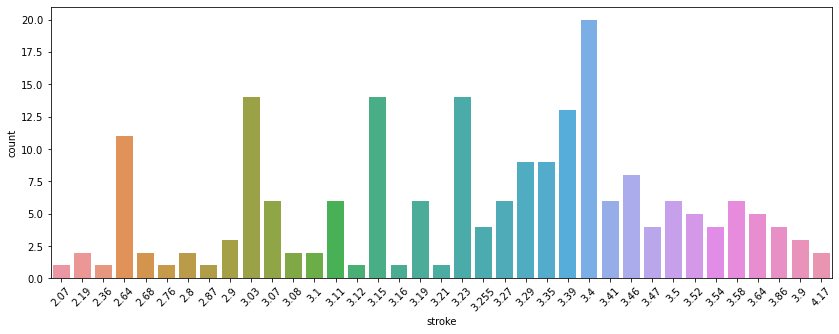

_________________________________________________________--
9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
23.00     5
21.00     5
9.60      5
8.60      5
8.40      5
7.50      5
7.60      4
21.50     4
8.30      3
22.50     3
8.80      3
10.00     3
8.10      2
7.70      2
10.10     1
9.41      1
7.80      1
22.00     1
9.10      1
22.70     1
11.50     1
21.90     1
9.31      1
Name: compressionratio, dtype: int64


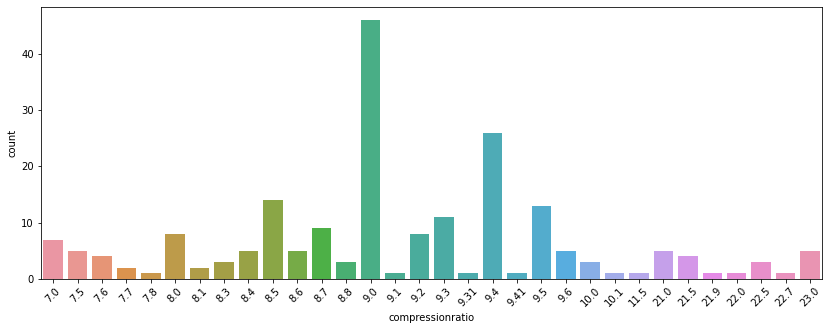

_________________________________________________________--
68     19
70     11
69     10
116     9
110     8
95      7
160     6
88      6
101     6
62      6
114     6
76      5
90      5
84      5
82      5
102     5
145     5
97      5
111     4
123     4
86      4
92      4
121     3
152     3
182     3
207     3
85      3
73      3
94      2
155     2
100     2
184     2
112     2
176     2
56      2
162     2
161     2
52      2
156     2
154     1
175     1
48      1
200     1
55      1
140     1
143     1
142     1
135     1
134     1
58      1
60      1
120     1
64      1
115     1
72      1
78      1
106     1
288     1
262     1
Name: horsepower, dtype: int64


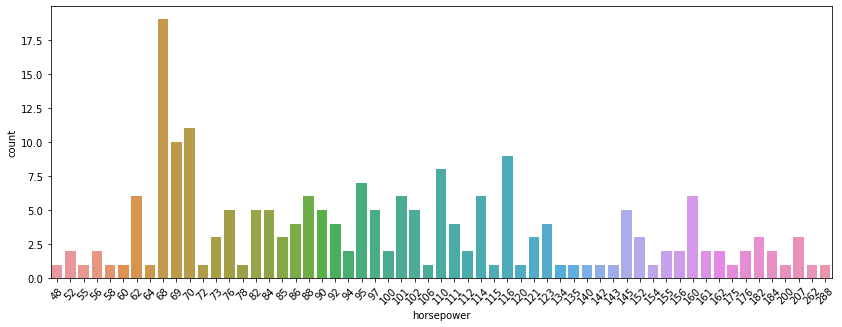

_________________________________________________________--


In [14]:
for column in details:
    print(df[column].value_counts())
    plt.figure(figsize=(14,5))
    sns.countplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()
    print("_________________________________________________________--")

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>],
       [<AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'boreratio'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peakrpm'}>],
       [<AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

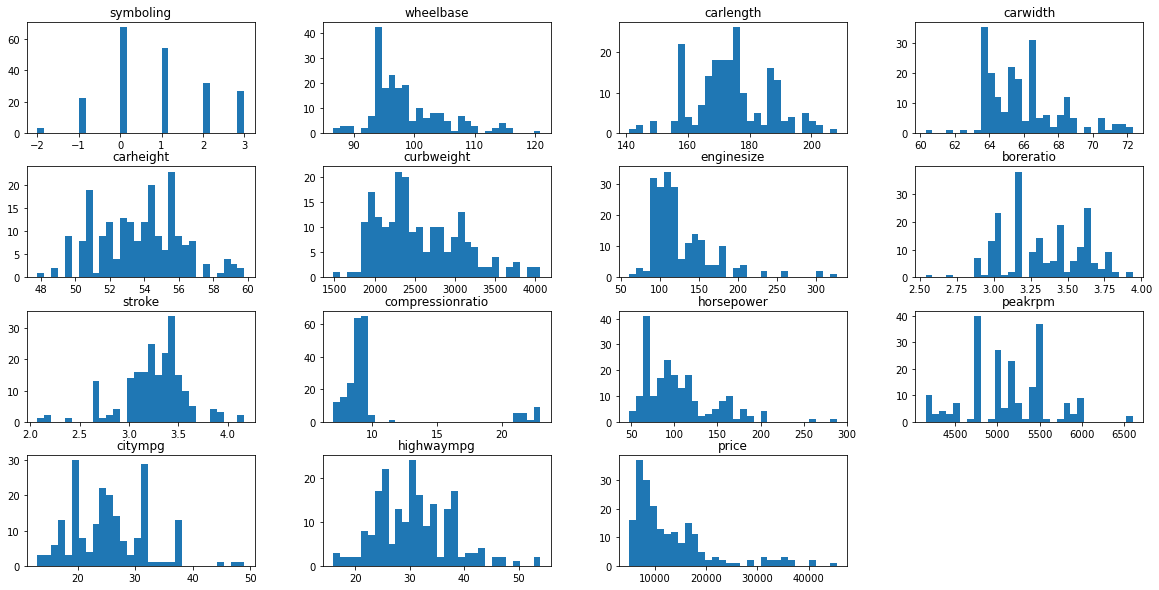

In [15]:
df.hist(figsize=(20,10), grid=False, layout=(4, 4), bins = 30)

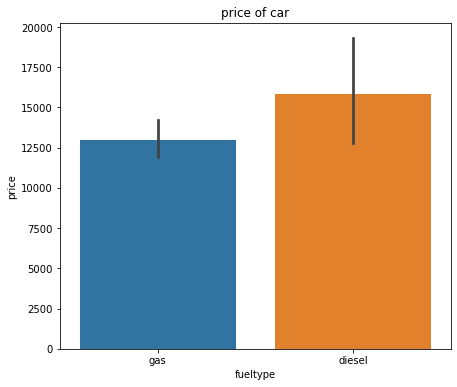

In [16]:
plt.figure(figsize=[7,6])
sns.barplot(x='fueltype', y='price', data = df.sort_values('price', ascending=False))
plt.title('price of car')
plt.show()

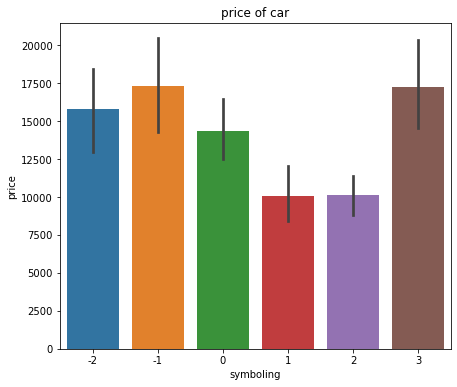

In [17]:
plt.figure(figsize=[7,6])
sns.barplot(x='symboling', y='price', data = df.sort_values('price', ascending=True))
plt.title('price of car')
plt.show()

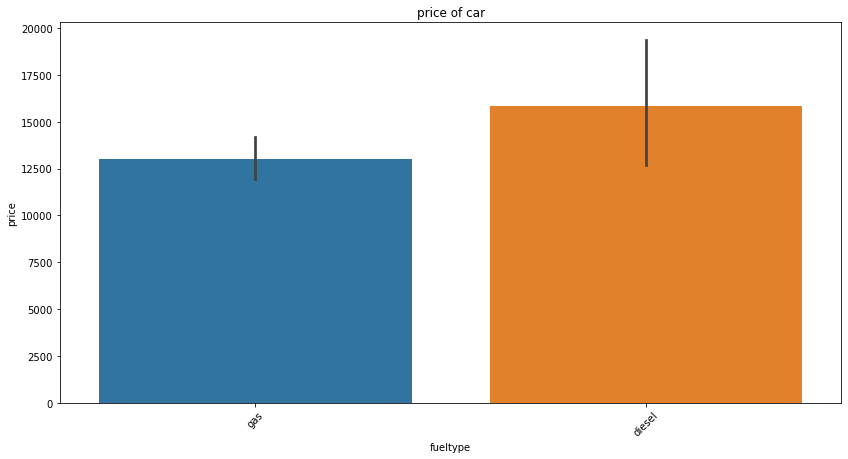

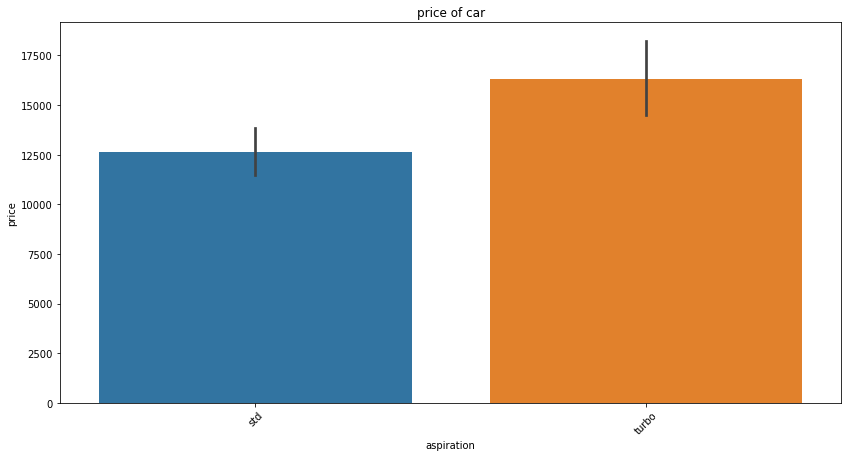

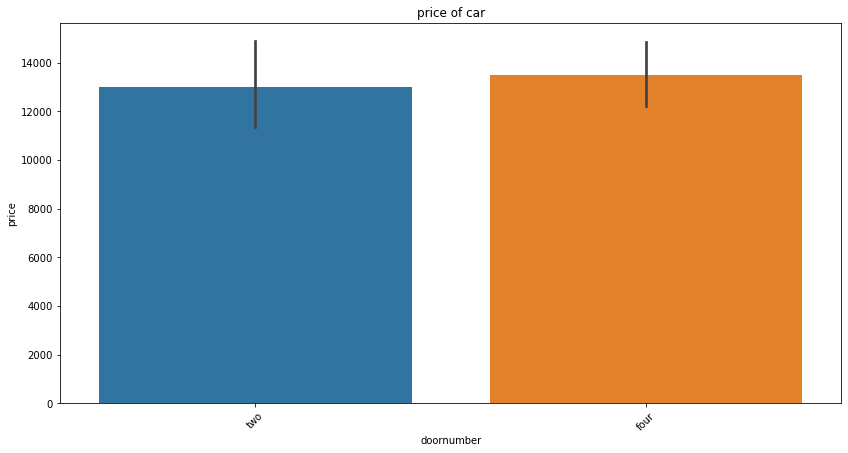

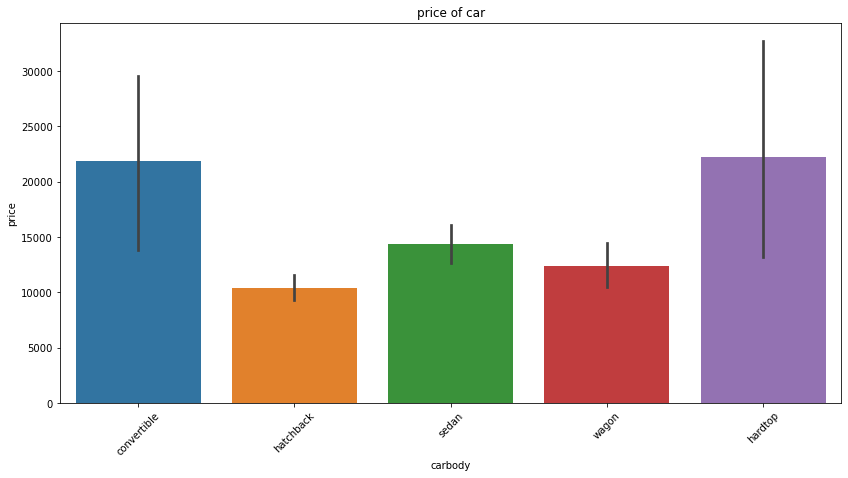

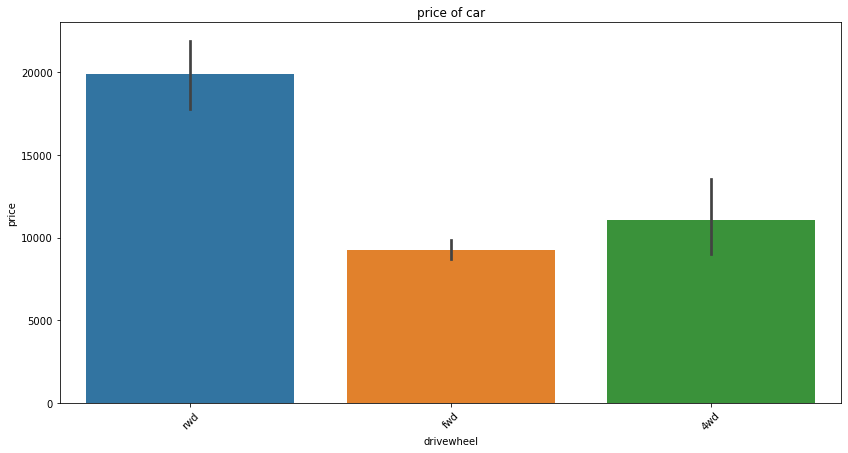

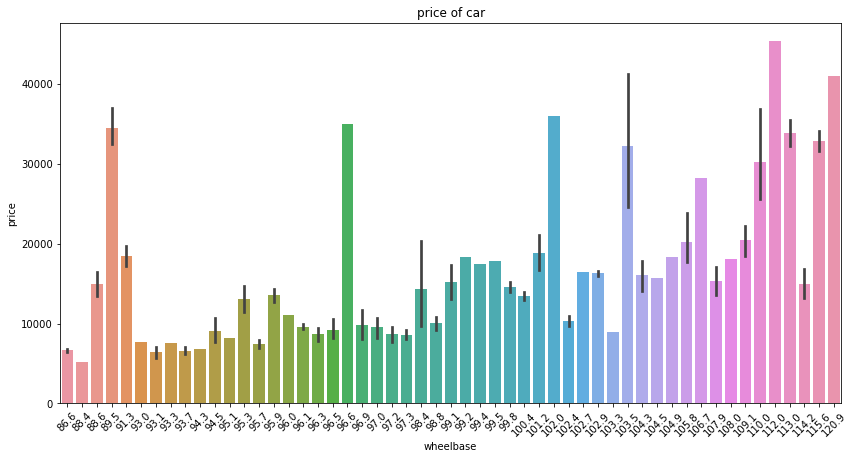

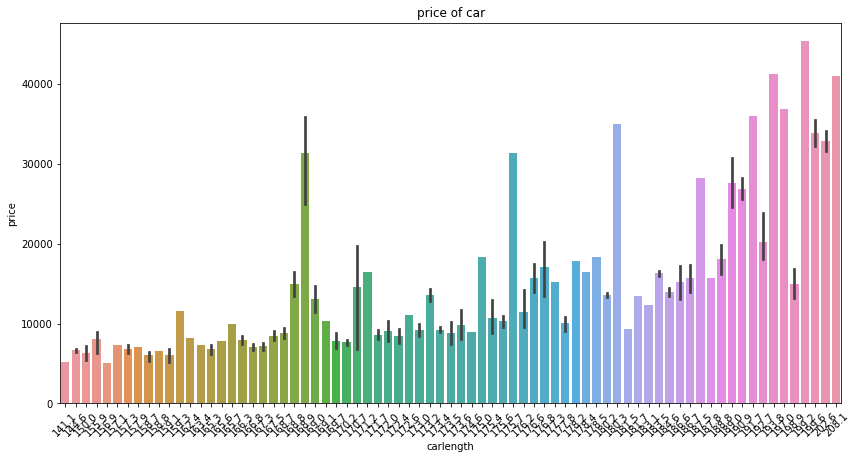

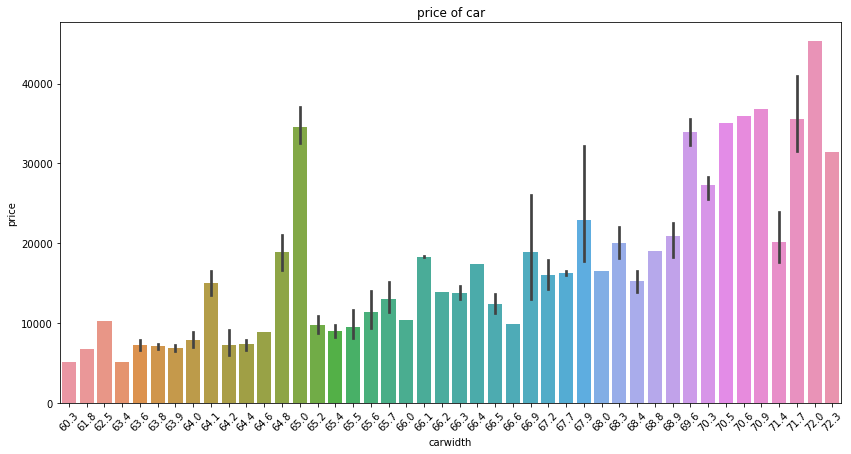

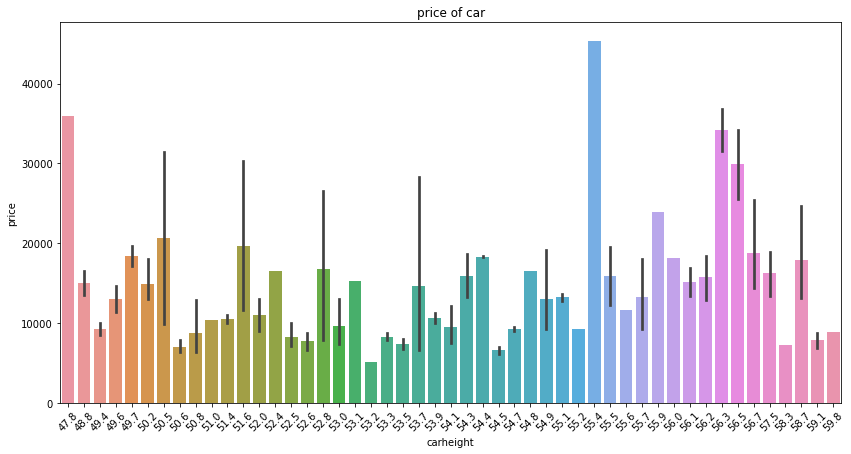

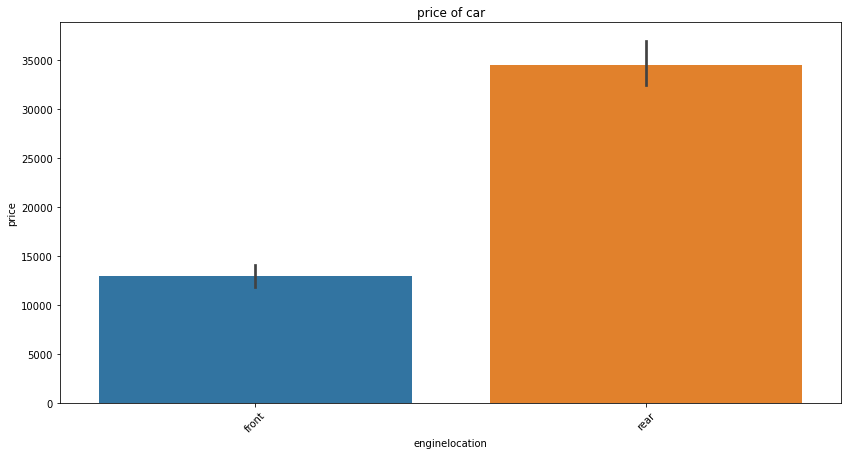

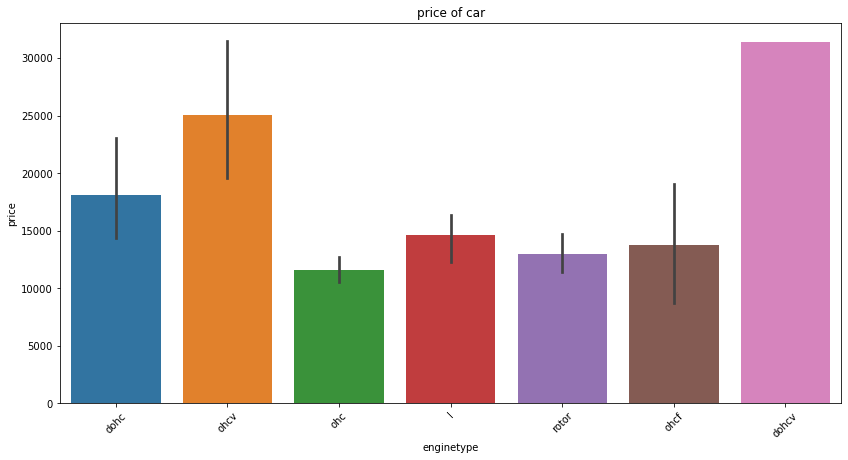

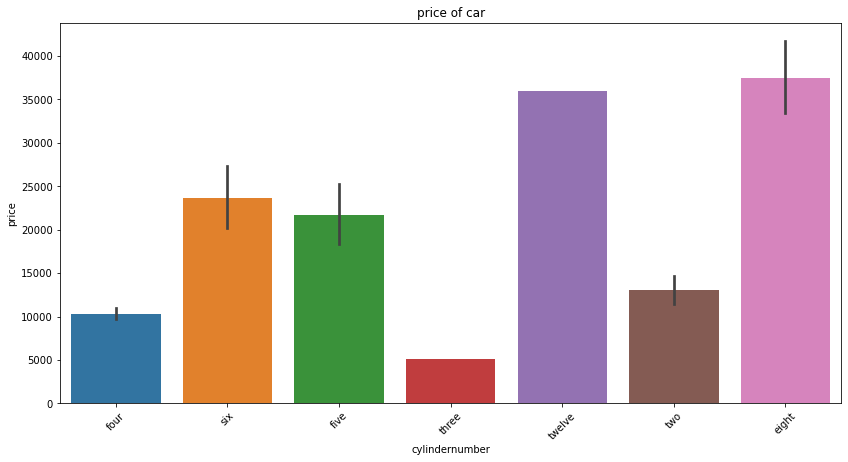

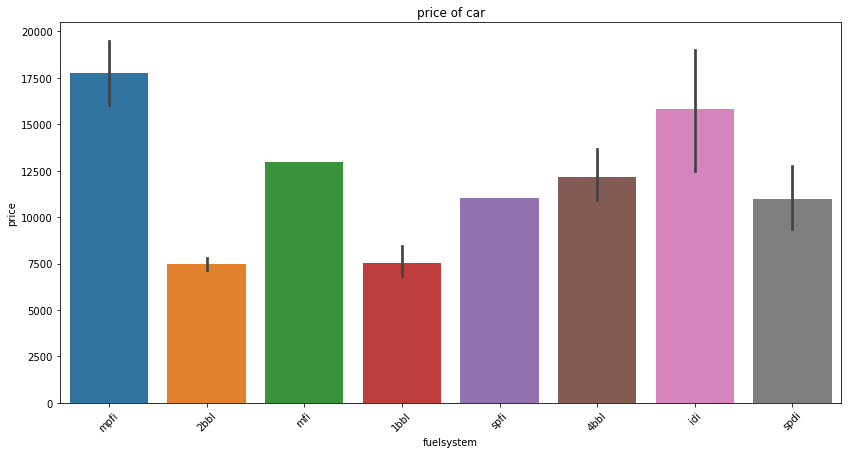

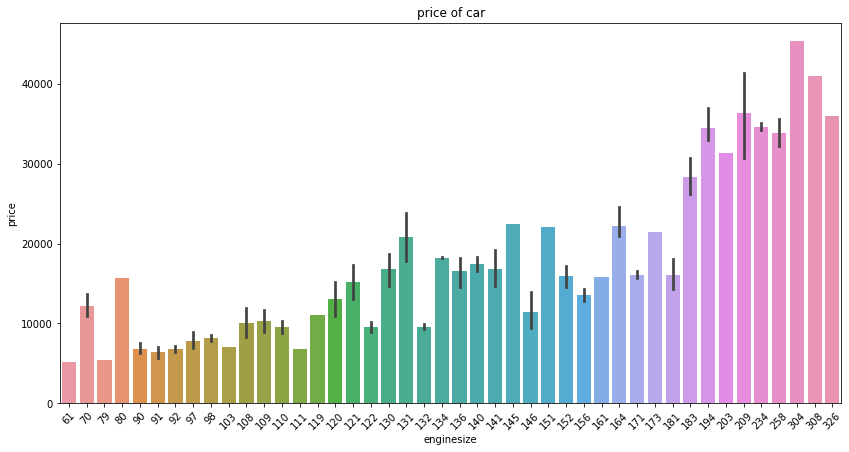

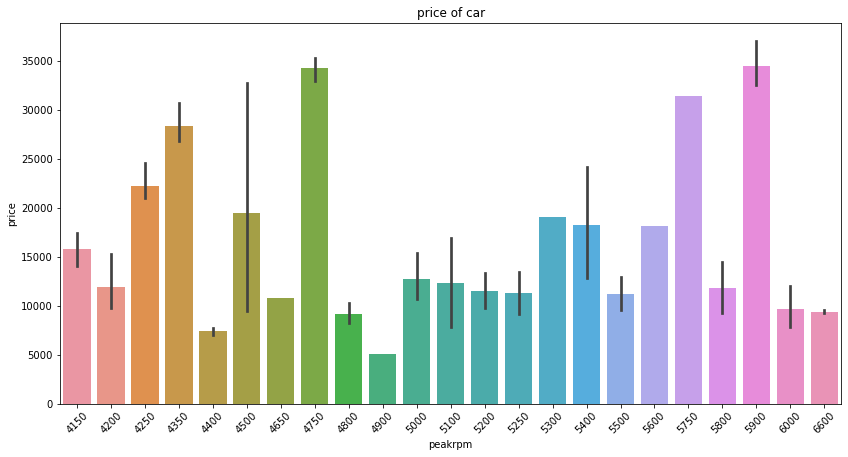

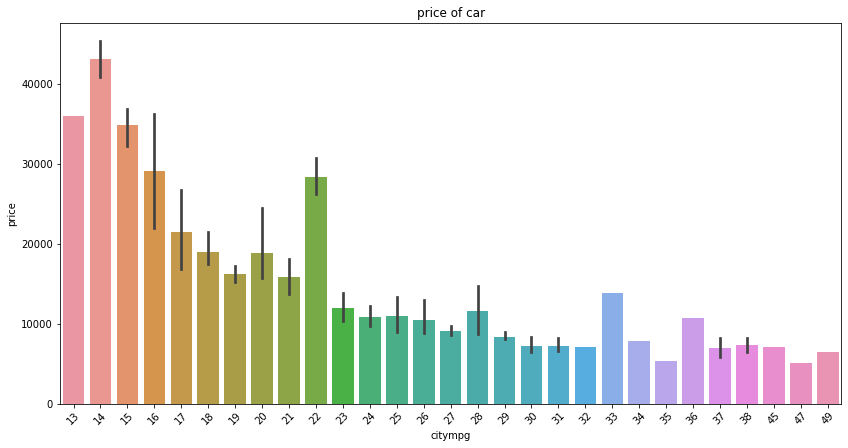

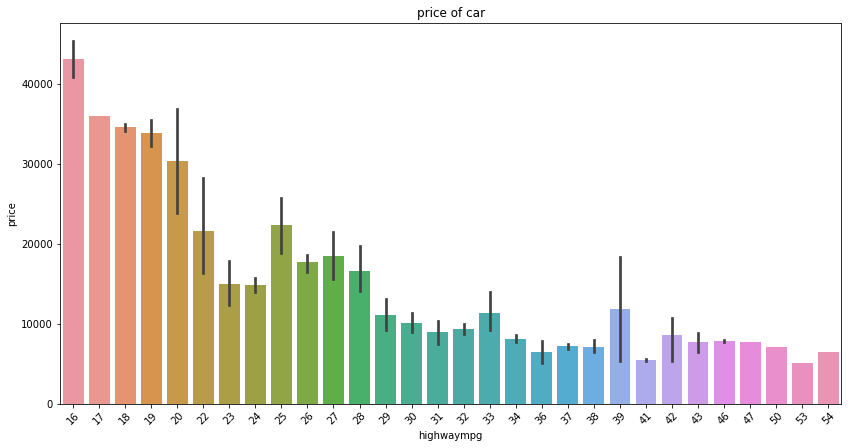

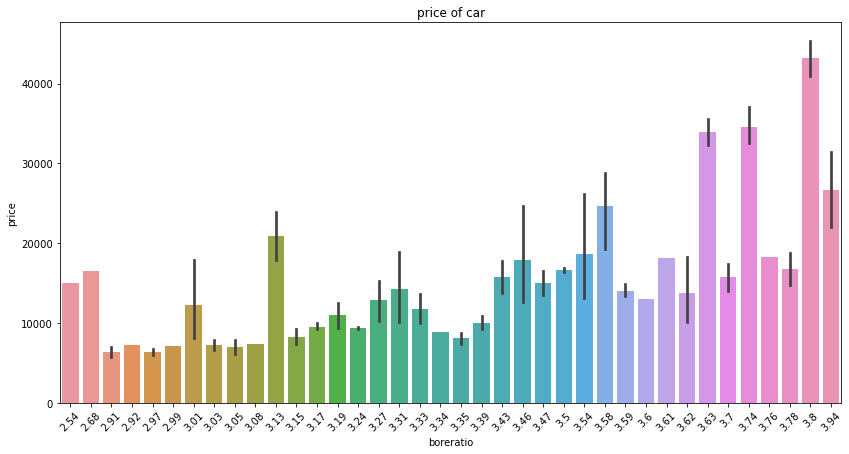

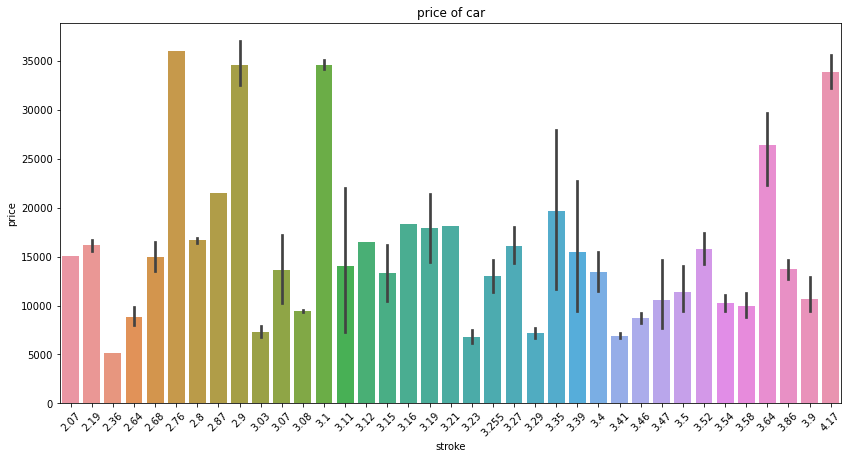

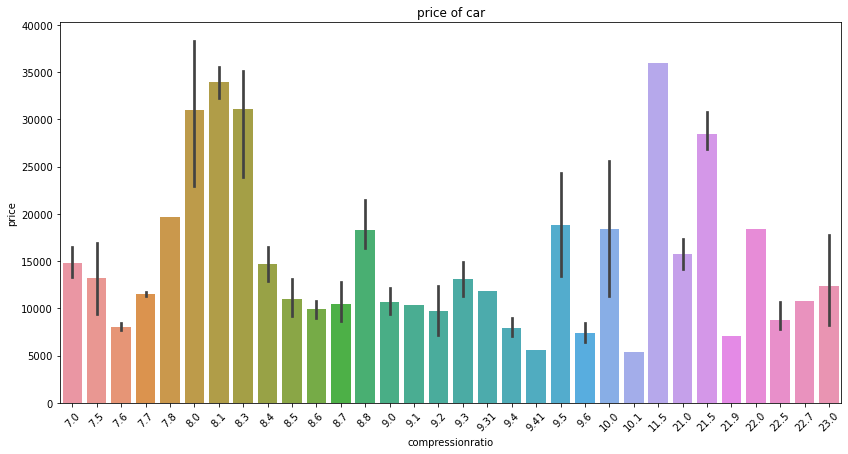

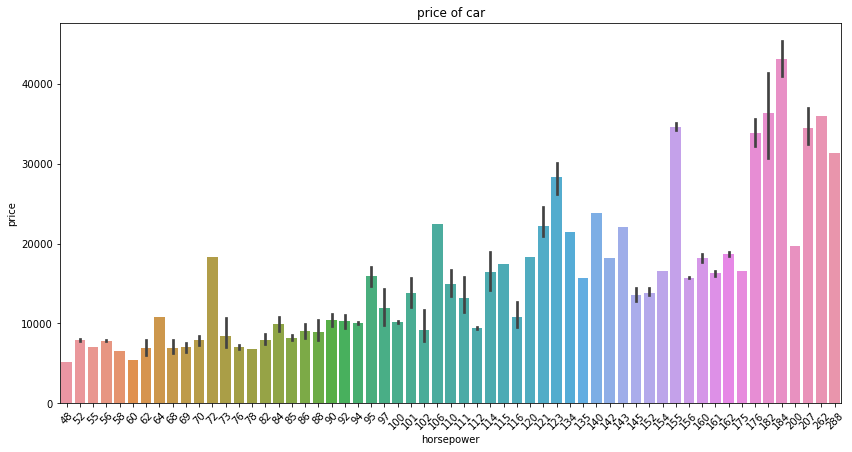

In [18]:
for column in details:
    plt.figure(figsize=(14,7))
    sns.barplot(x=df[column], y='price', data = df.sort_values('price', ascending=False))
    plt.title('price of car')
    plt.xticks(rotation=45)
    plt.show()
   

INFERENCE:

It seems aspiration with turbo have higher price range than the std.

The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.

The car with four door has high price  compared to two door cars.DoorNumber isn't affecting the price much

All the types of carbody is relatively cheaper as compared to convertible carbody.

HigerEnd cars seems to have rwd drivewheel.RWD car have better handling than FWD vehicles.

The cars with rear enginelocation are way expensive than cars with front enginelocation.

The price of car is directly proportional to no. of cylinders in most cases.

Enginetype ohcv comes into higher price range cars.ohc Engine type seems to be most favored type.



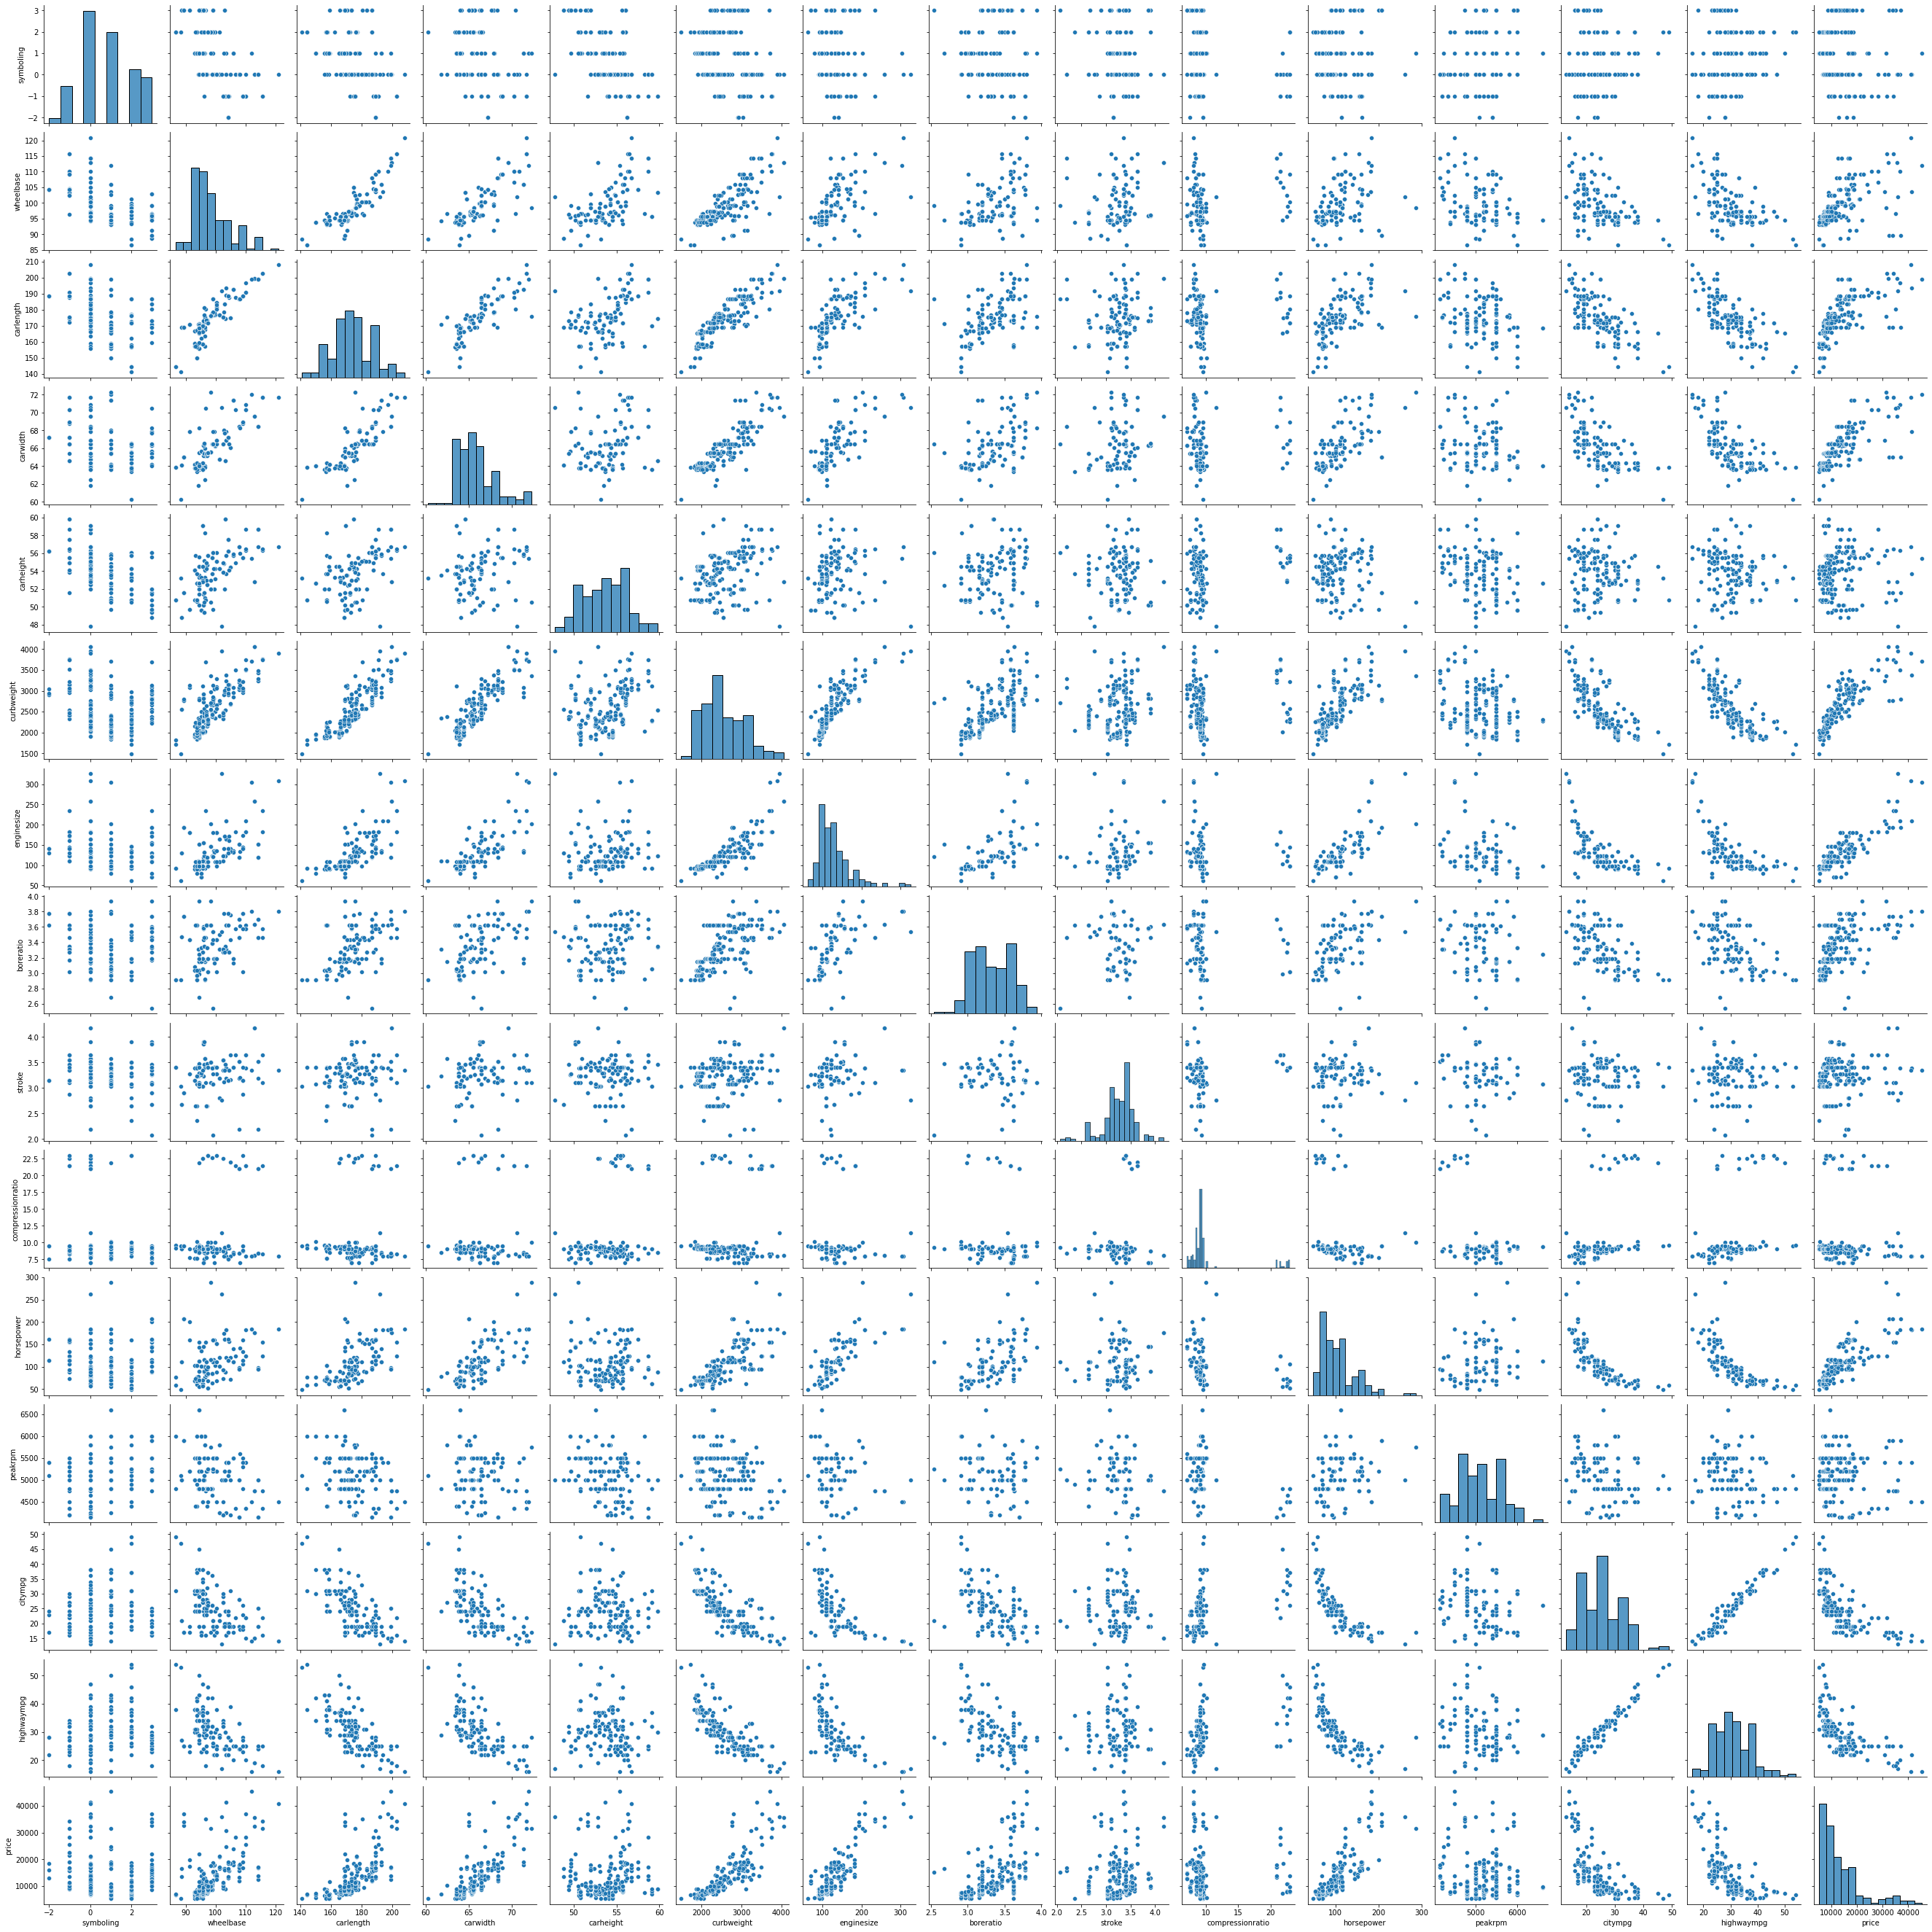

In [19]:
sns.pairplot(df)

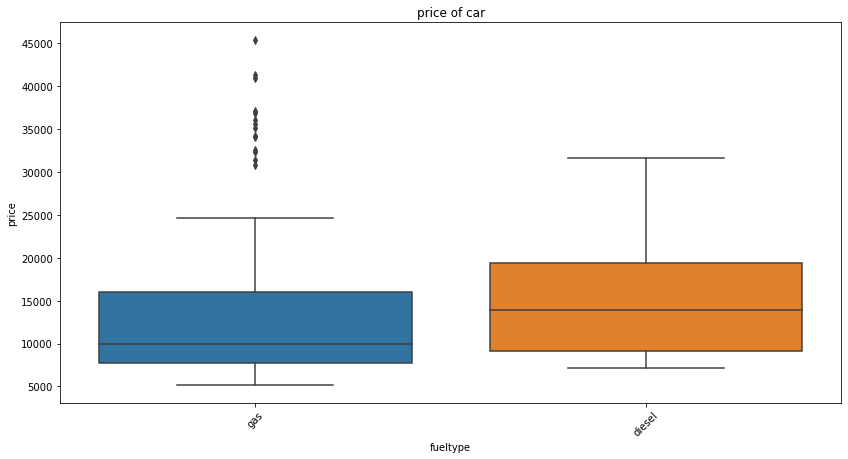

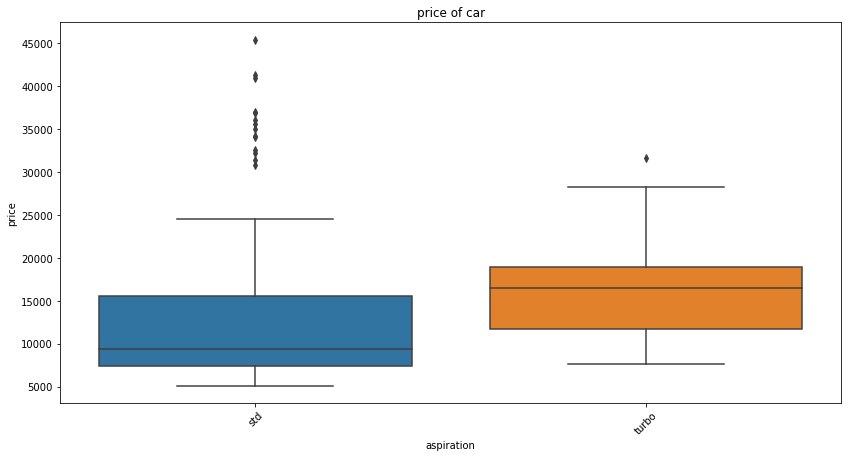

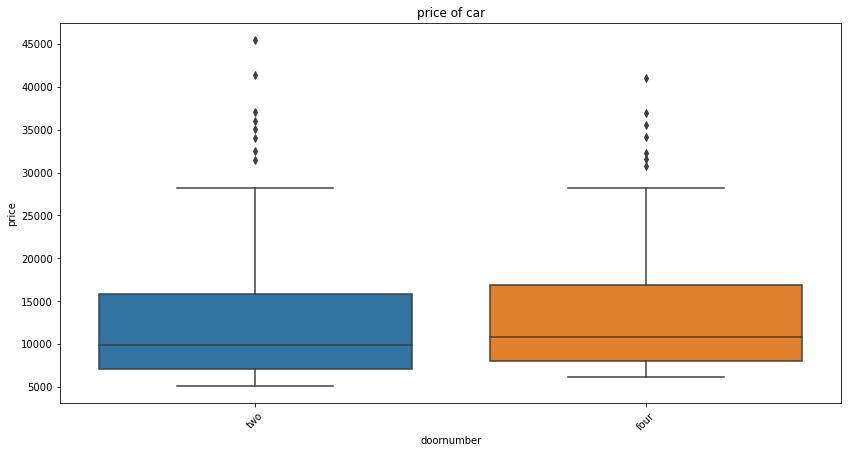

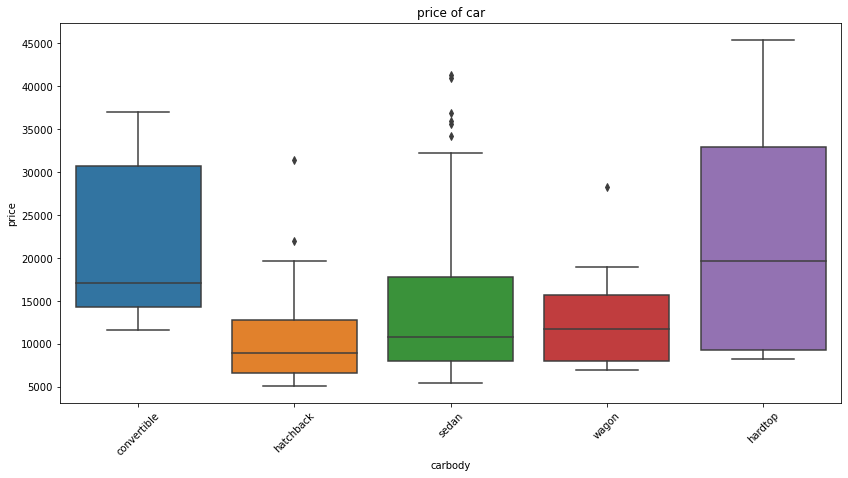

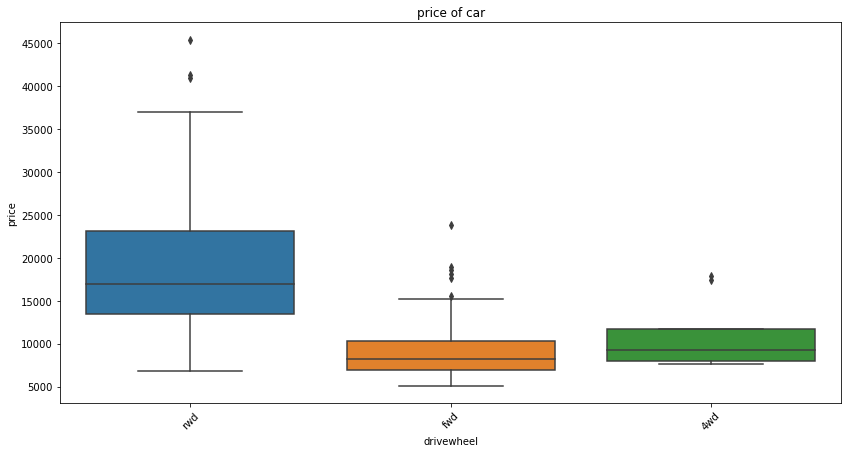

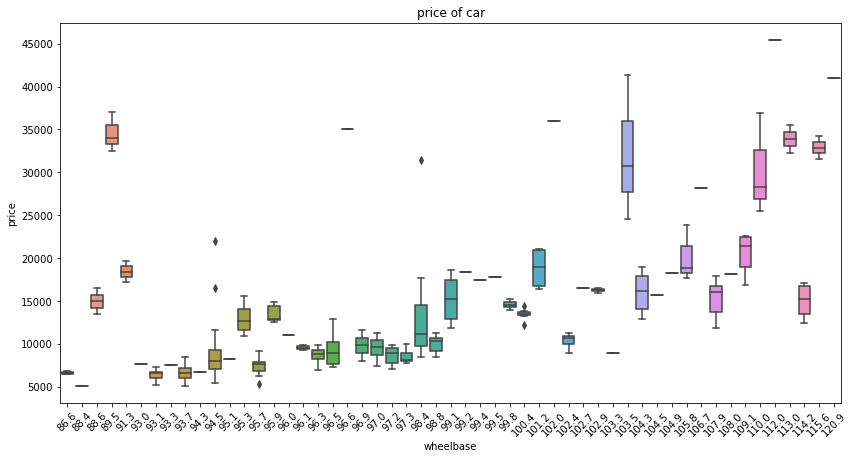

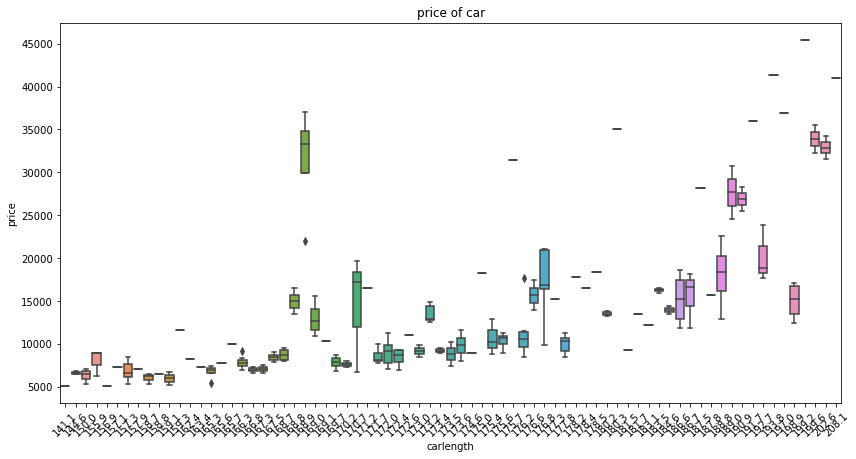

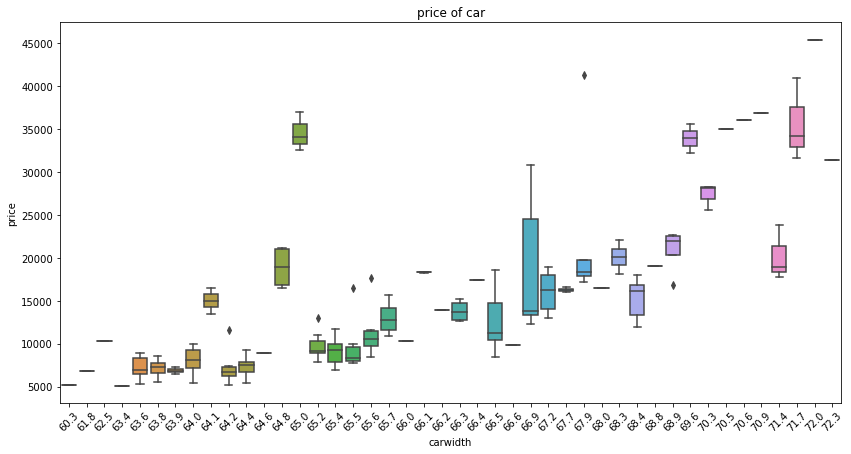

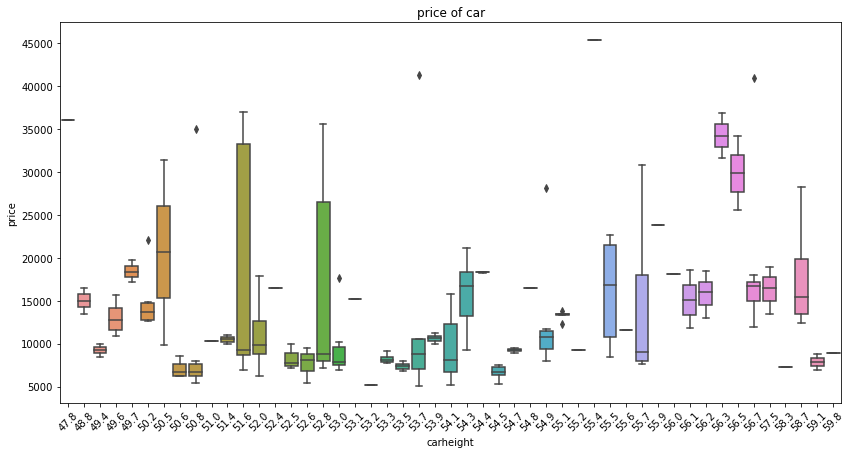

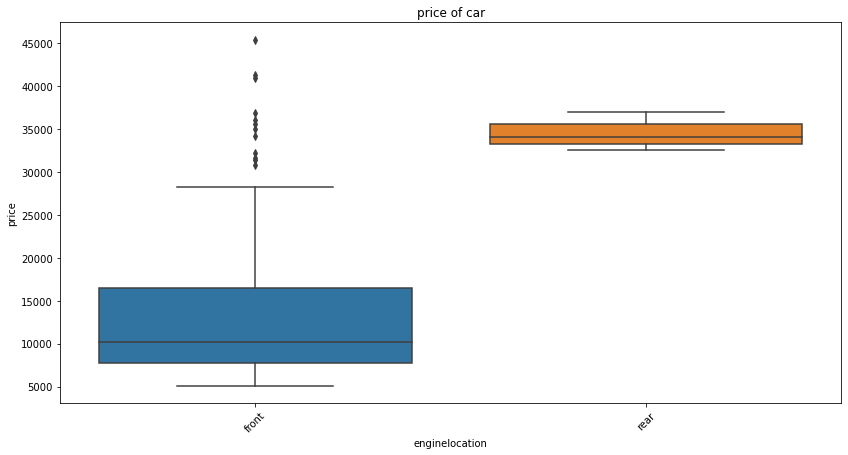

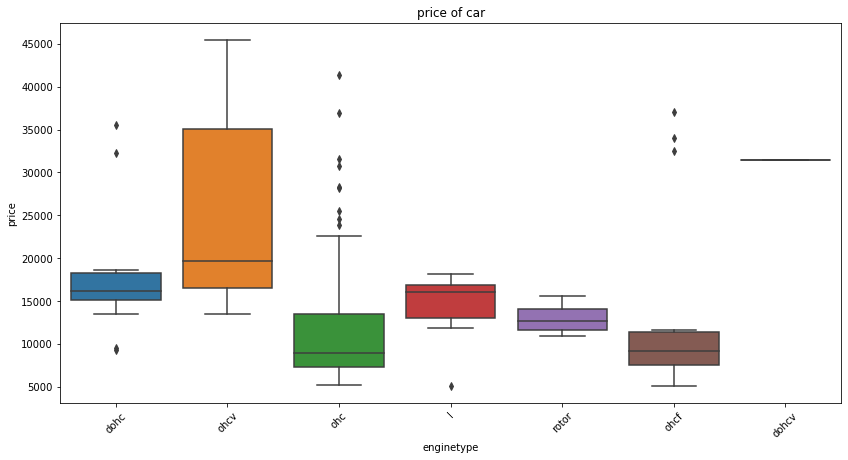

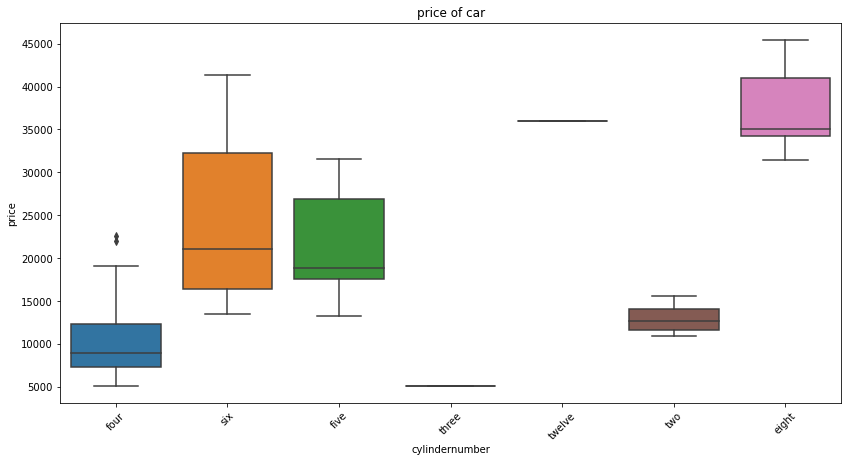

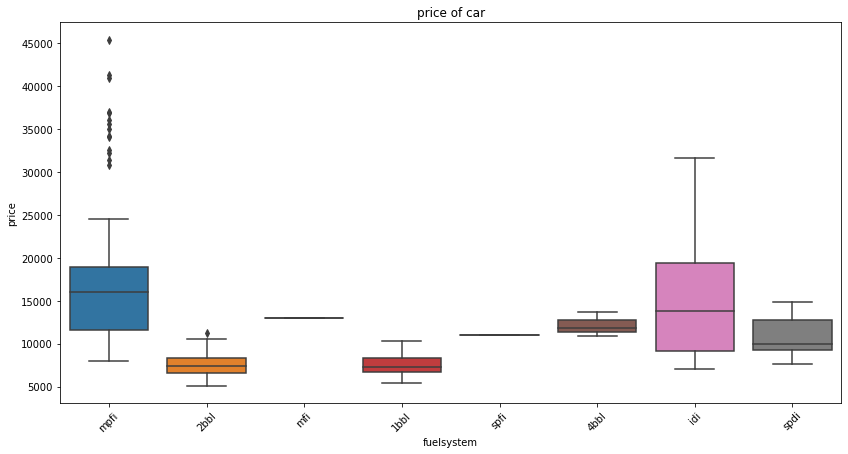

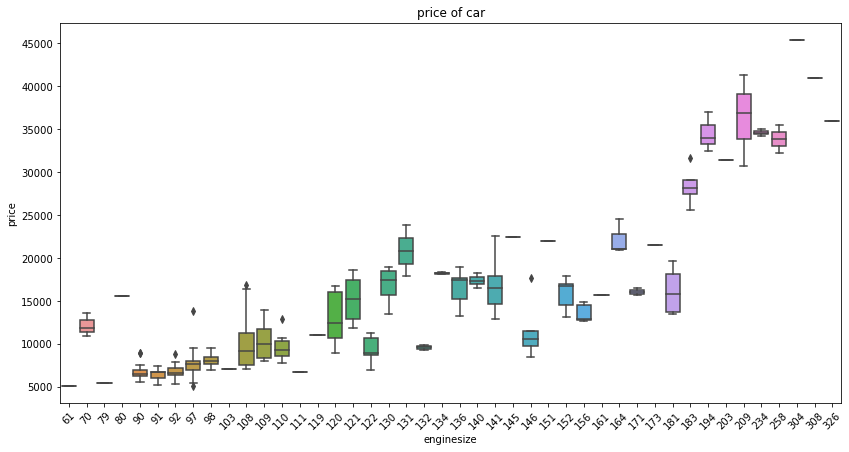

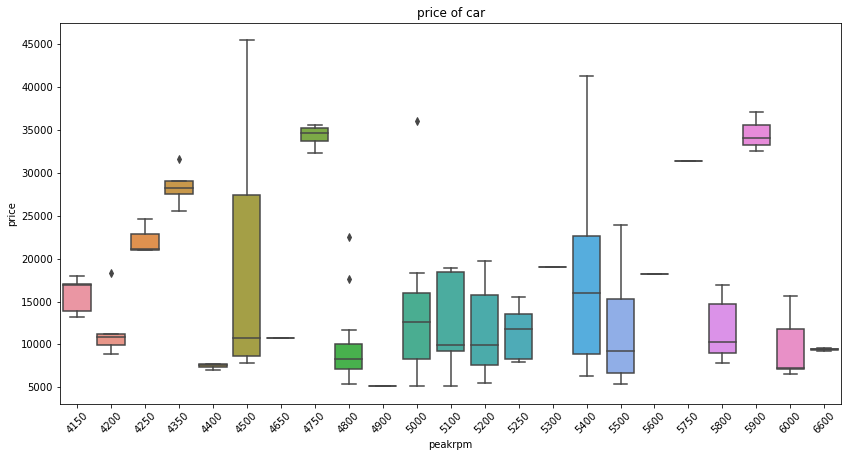

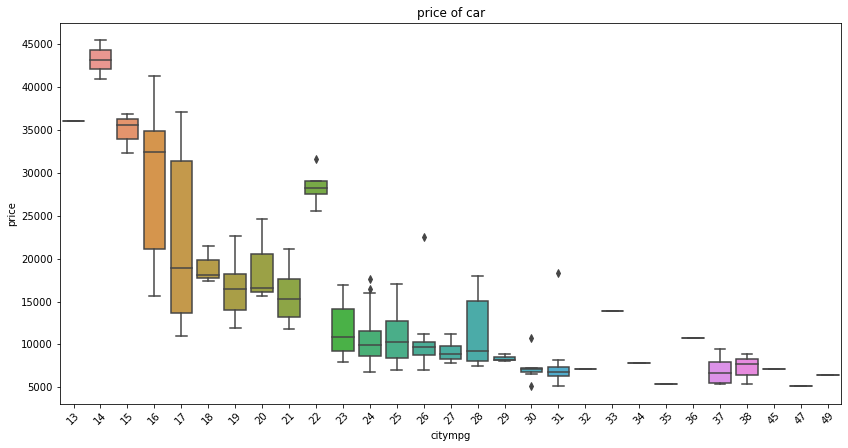

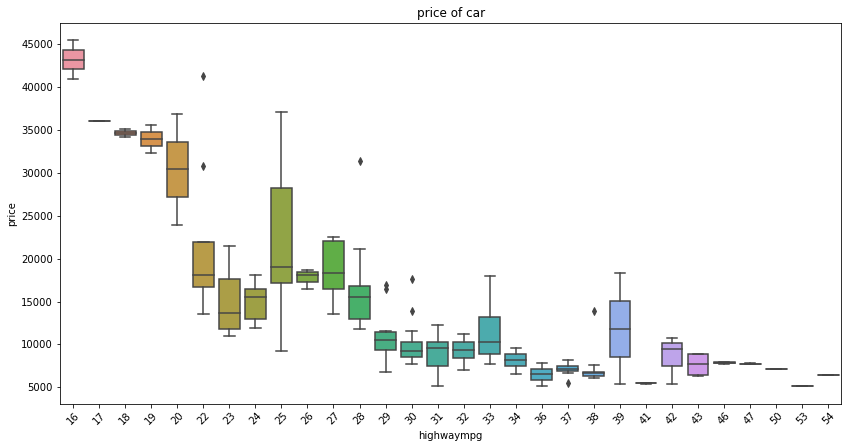

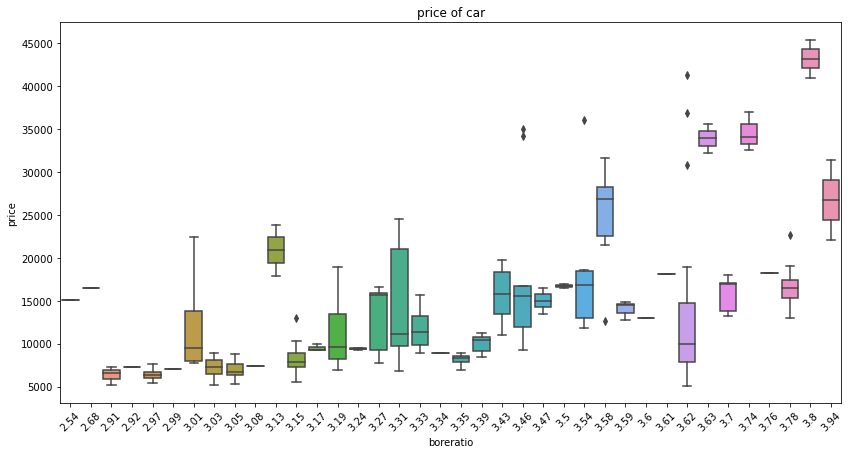

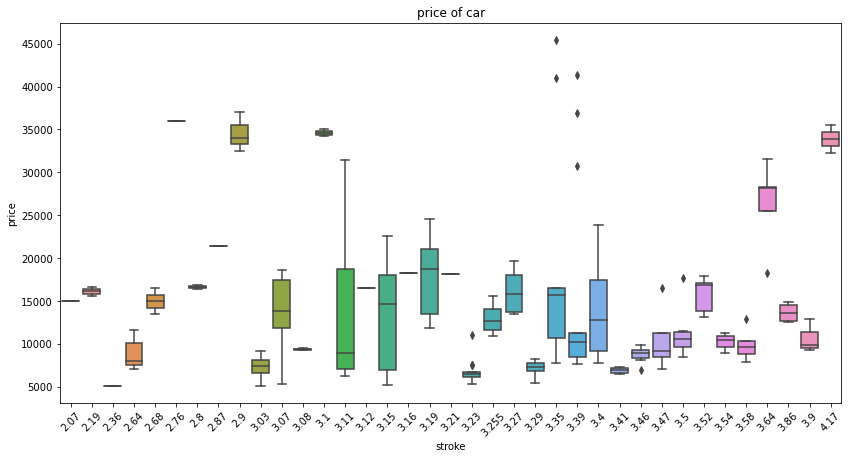

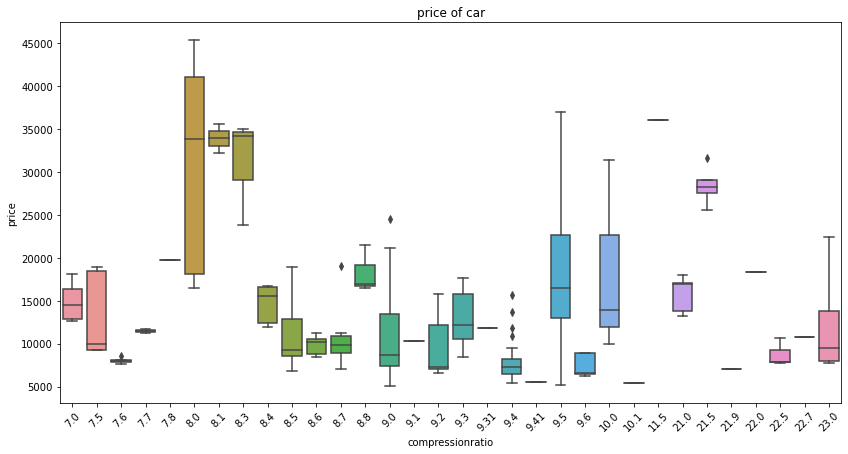

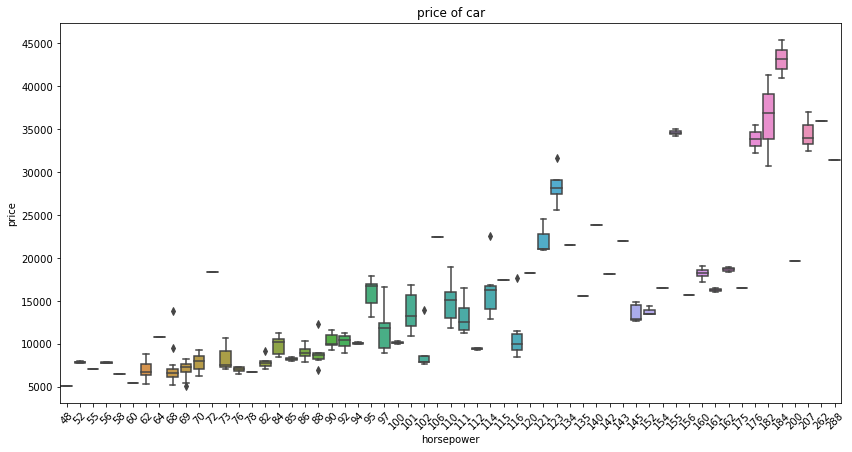

In [20]:
for column in details:
    plt.figure(figsize=(14,7))
    sns.boxplot(x=df[column], y='price', data = df.sort_values('price', ascending=False))
    plt.title('price of car')
    plt.xticks(rotation=45)
    plt.show()

### Correlation

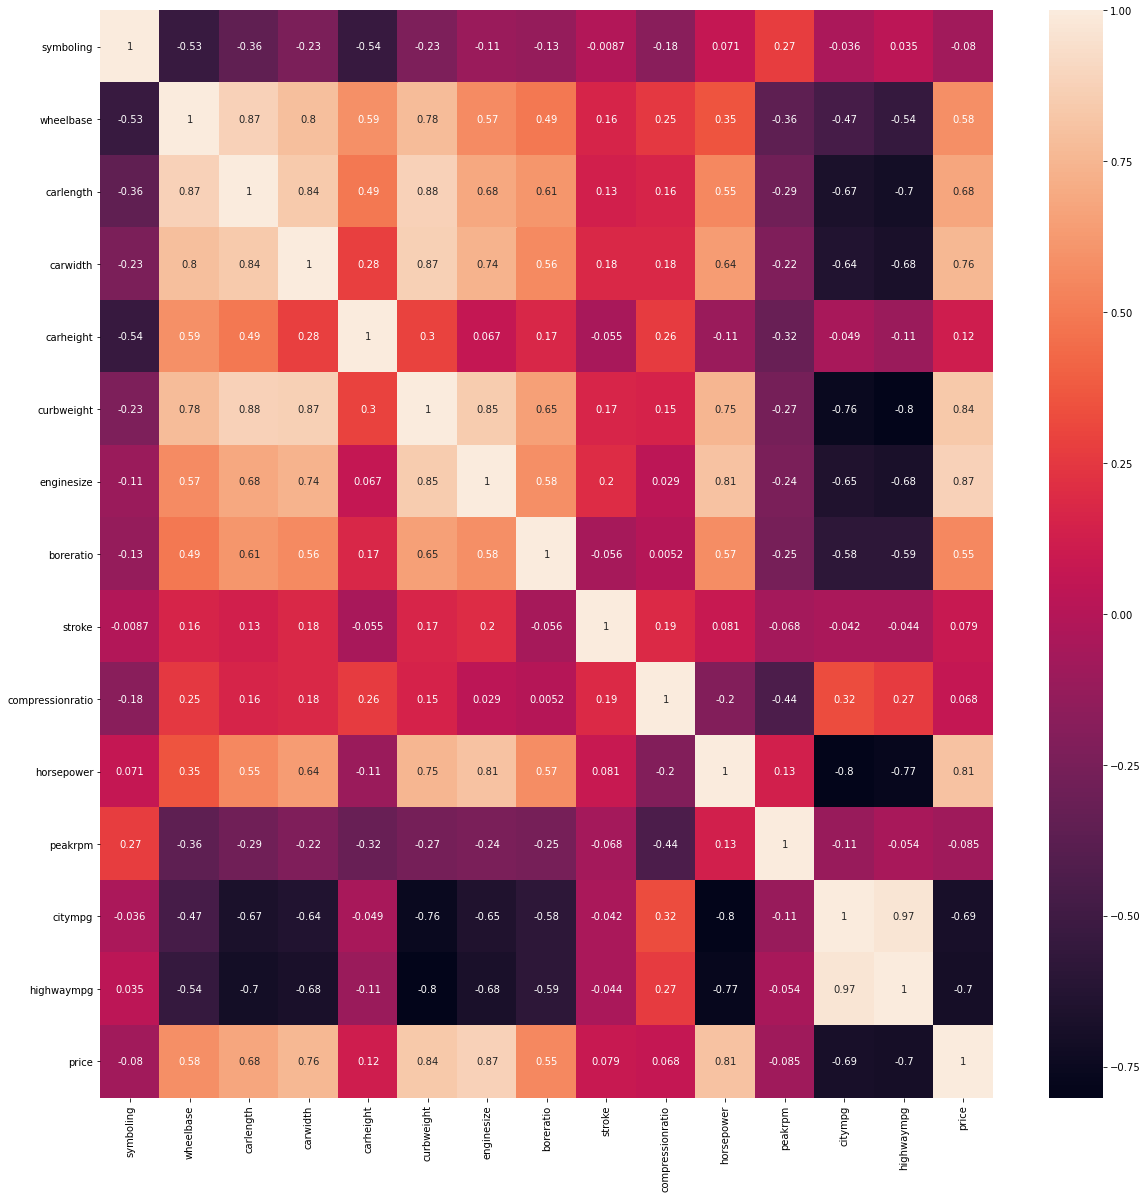

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='rocket') 
plt.show()

INFERENCE:

From this correlation visualization, we will find which features are correlated with other features.

wheelbase have positive correlation with price of 58%.

car length and car width have positive correlation with price of 68% and 76%.

curbweight have positive correlation with price of 84%.

enginesize have positive correlation with price of 87%.

boreratio have positive correlation with price of 55%.

horsepower have positive correlation with price of 81%.

citympg and highwaympg have negative correlation with price of 69% and 70%.

The strongly correlated items are: 1.Citympg and Highwaympg . 2.Car length and car width. 3.Curbsize and engine size.

max correlation :Curbsize and engine size.

min correlation: Citympg and Highwaympg with price

In [22]:
df['CarName'] = df['CarName'].str.split(' ', expand = True)[0]

In [23]:
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
vw              2
maxda           2
Nissan          1
vokswagen       1
porcshce        1
toyouta         1
mercury         1
Name: CarName, dtype: int64

In [24]:
# handling duplicate values 

df['CarName'] = df['CarName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})

In [25]:
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

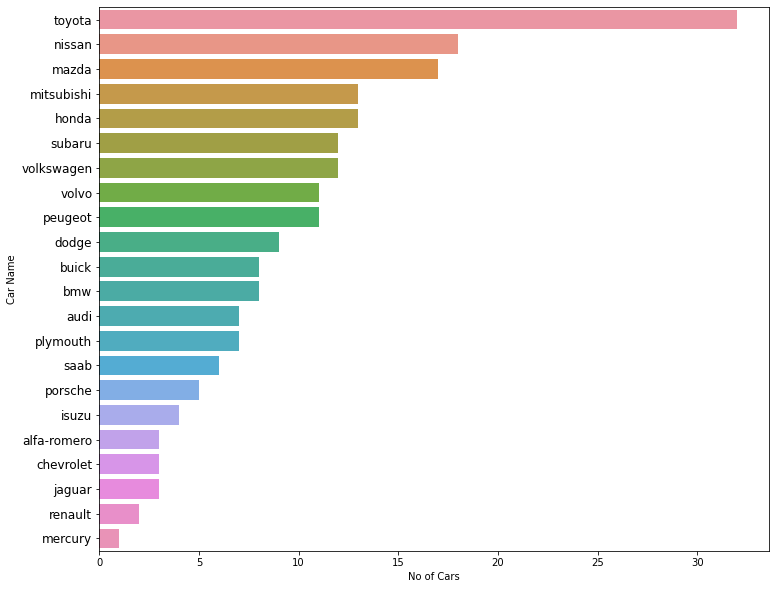

In [26]:
df1 = pd.DataFrame(df['CarName'].value_counts().reset_index())
df1.columns = ['Car Name', 'No of Cars']

plt.figure(figsize = (12, 10))
sns.barplot(x = 'No of Cars', y = 'Car Name', data = df1)
plt.yticks(size = 12)
plt.show()

INFERENCE:
    i)  Toyota seemed to be favored car company.
    ii) mercury is the less used car.

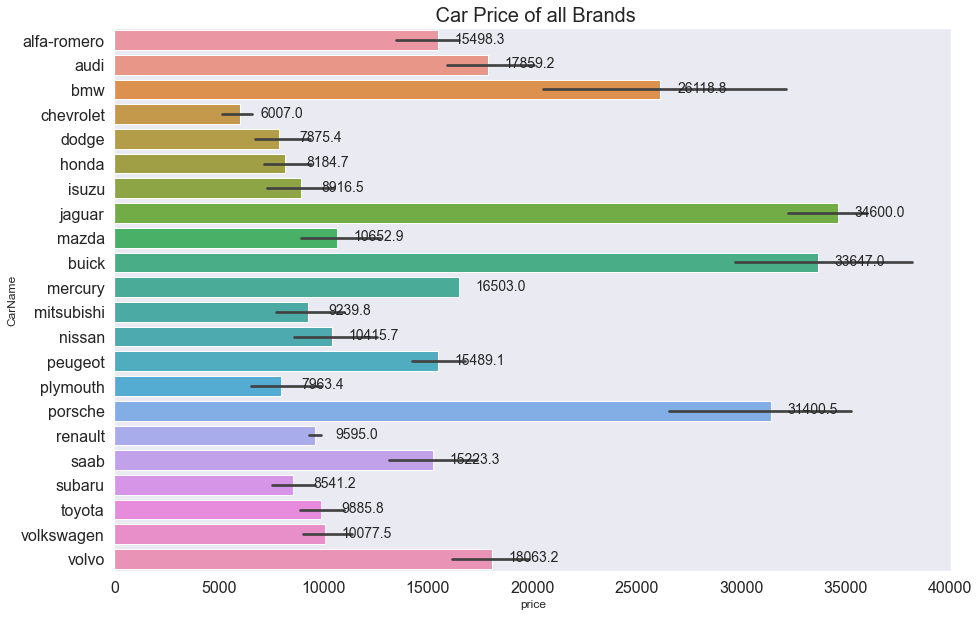

In [27]:
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(y ='CarName',x='price',data=df)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for p in a.patches:
    width = p.get_width()
    plt.text(2000+p.get_width(),p.get_y()+0.45*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14)
plt.title(" Car Price of all Brands",fontsize=20)
plt.grid(False)

INFERENCE:
    
    i)Jaguar,Porsche and buick have high price cars compare with others.
    
    ii)chevrolet,Honda and toyota have low price cars.

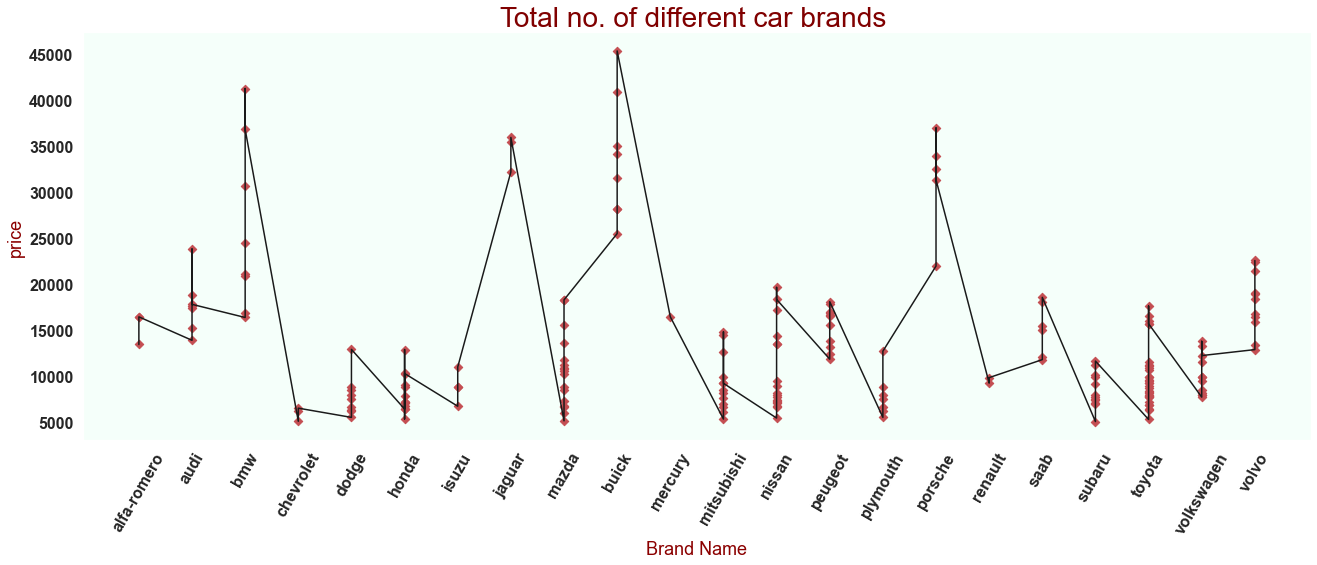

In [28]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('CarName','price',data=df,color='k')
plt.scatter('CarName','price',data=df,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands ",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("price", fontsize =18, color='darkred')
plt.grid(False)

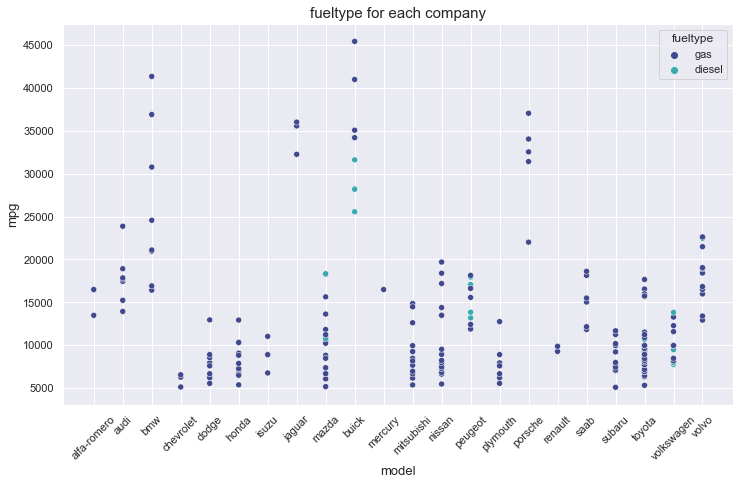

In [29]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CarName",y="price",data=df[0:10000],hue="fueltype",palette="mako")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("mpg" , size=13)
plt.xticks(rotation=45)
plt.show()

# 4.Data Pre processing

### Encoding

In [30]:
categ_columns=['Car Brand','Model','Gear','Fuel','Location' ]
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int32  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int32  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int32  
 14  cylindernumber    205 non-null    int32  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int32  
 1

### Skewness removal

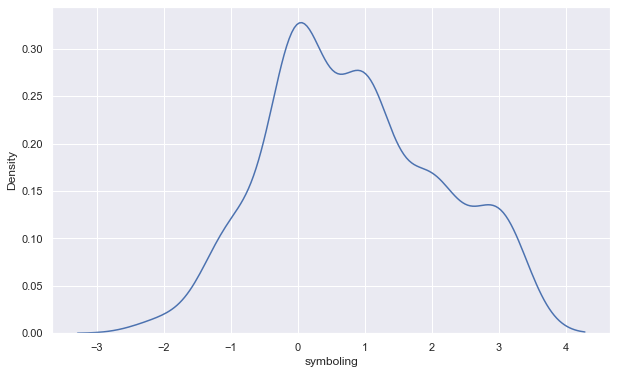

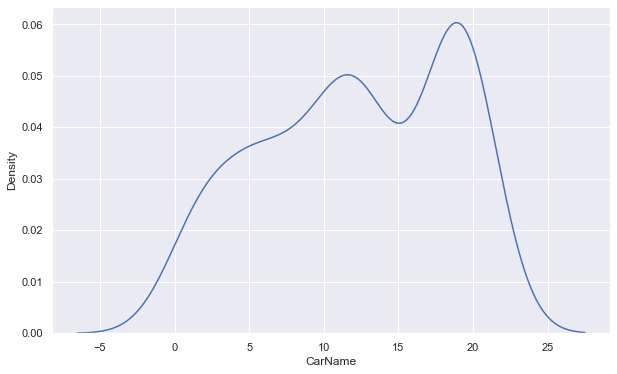

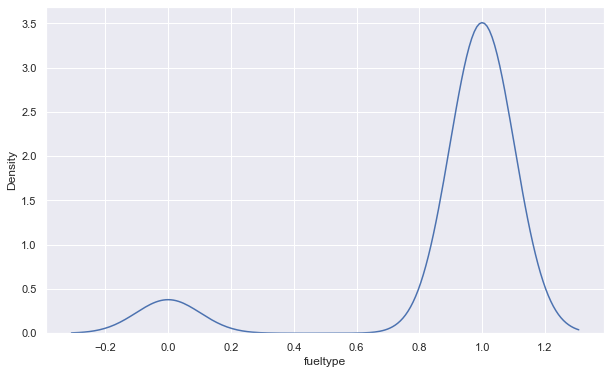

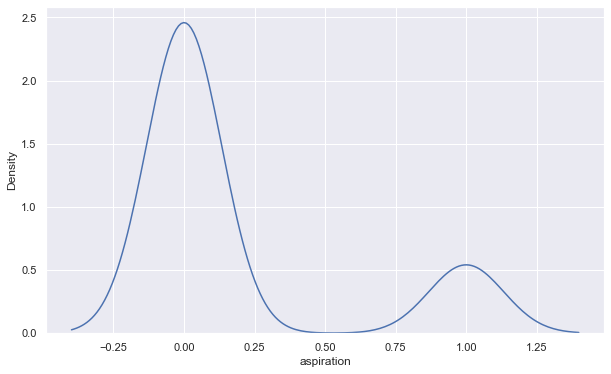

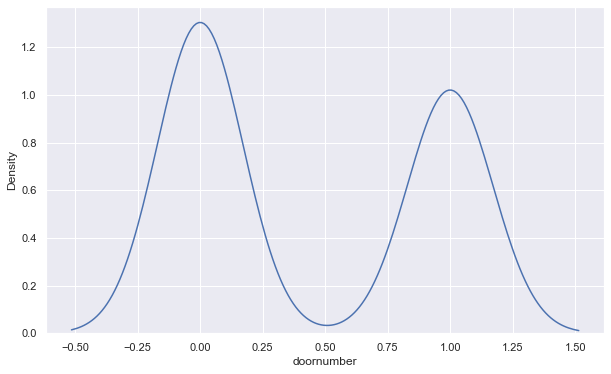

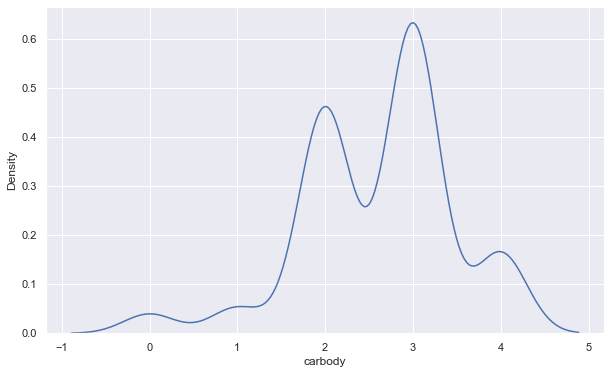

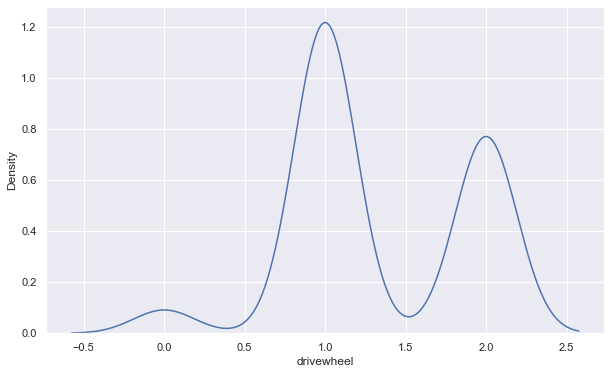

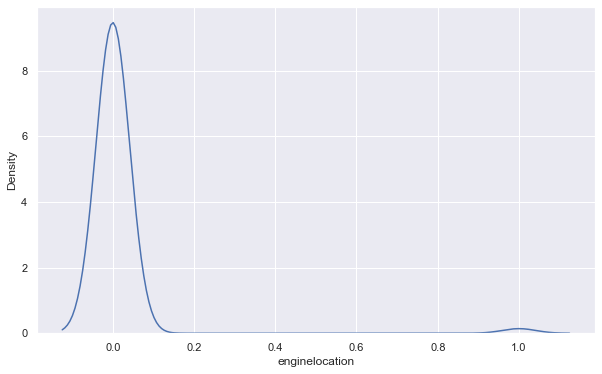

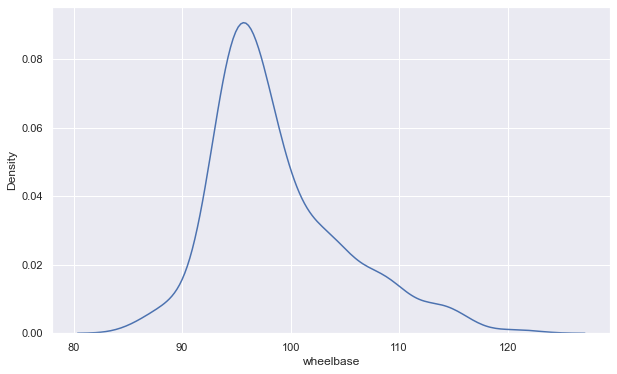

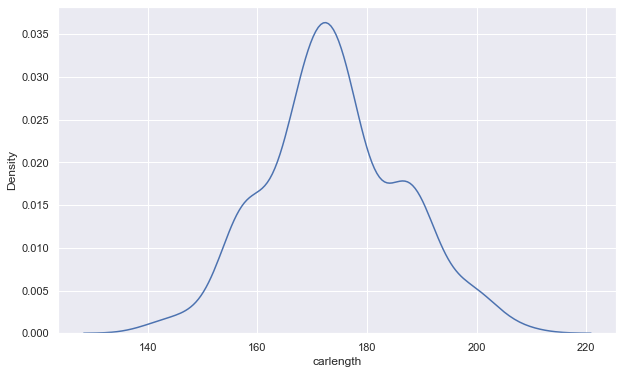

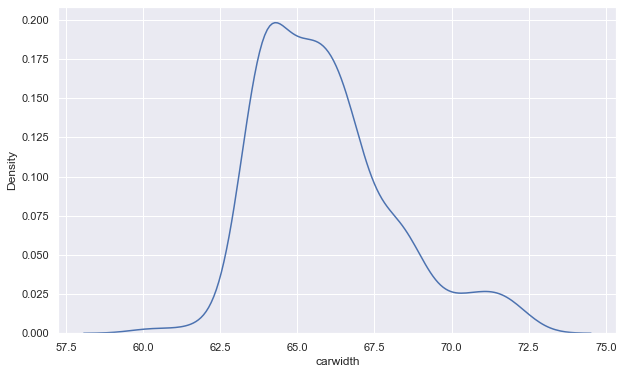

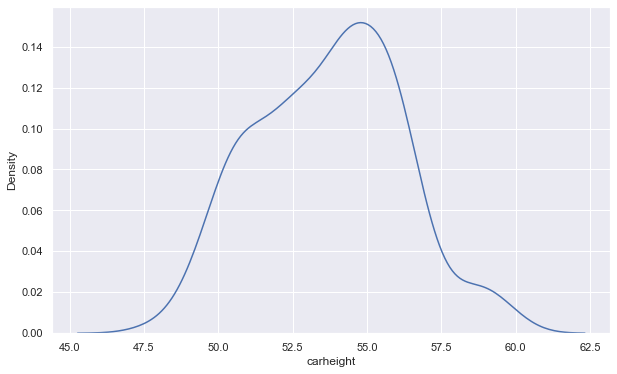

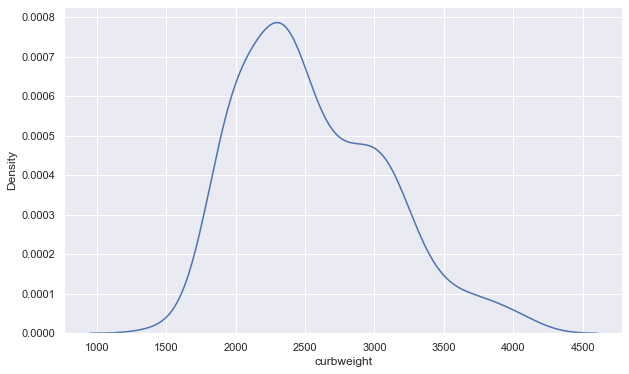

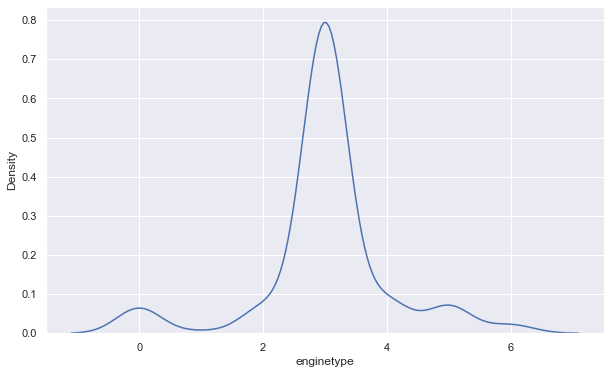

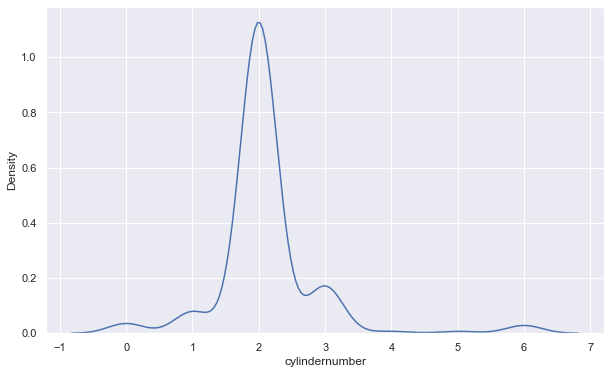

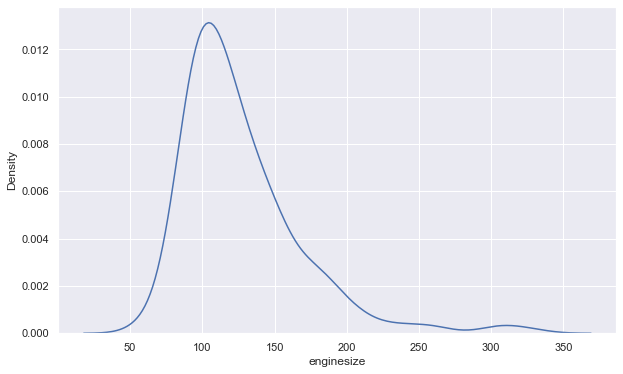

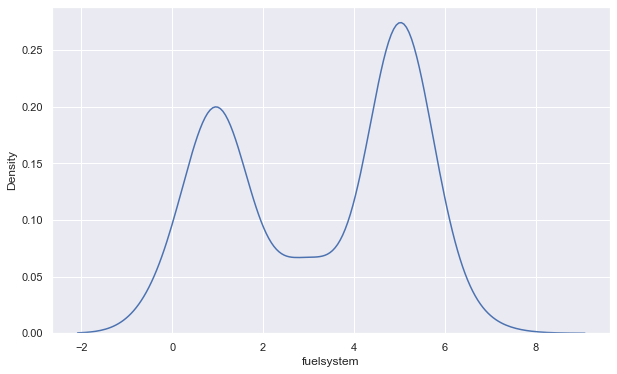

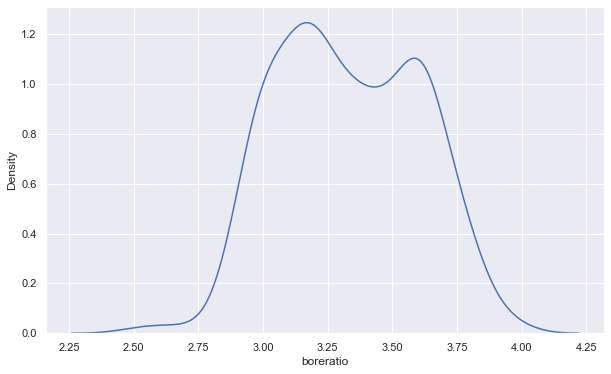

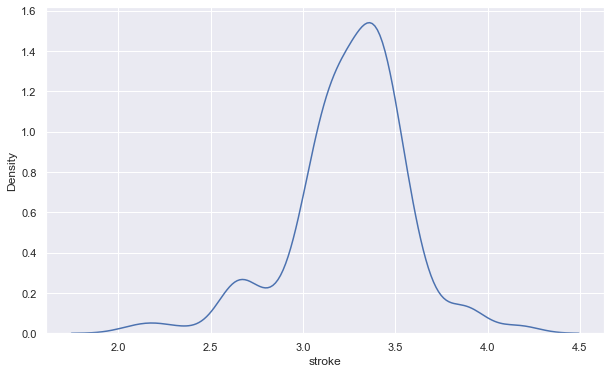

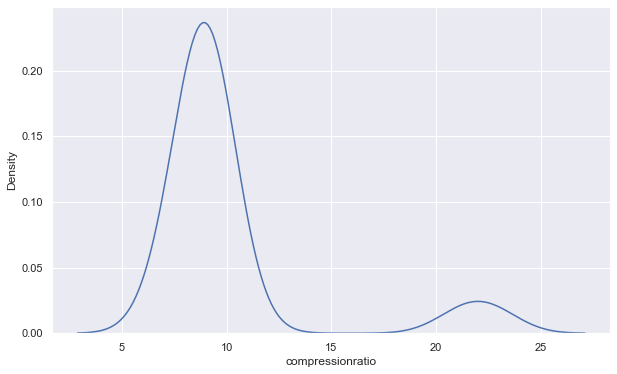

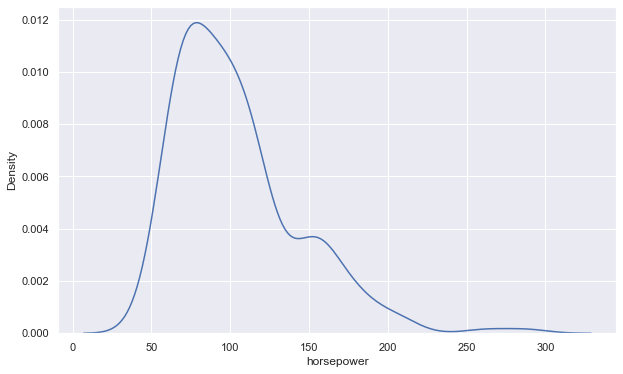

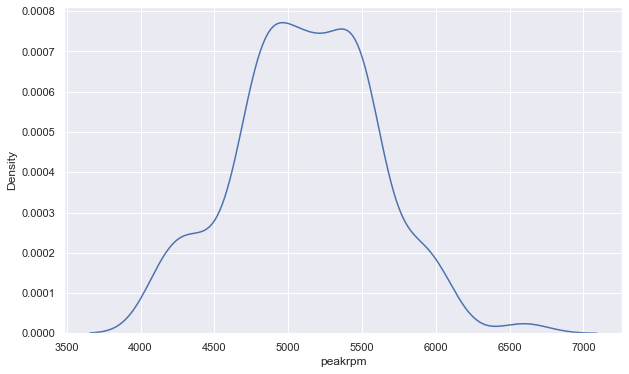

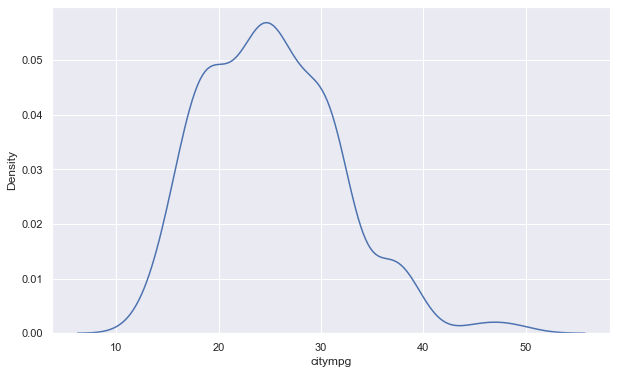

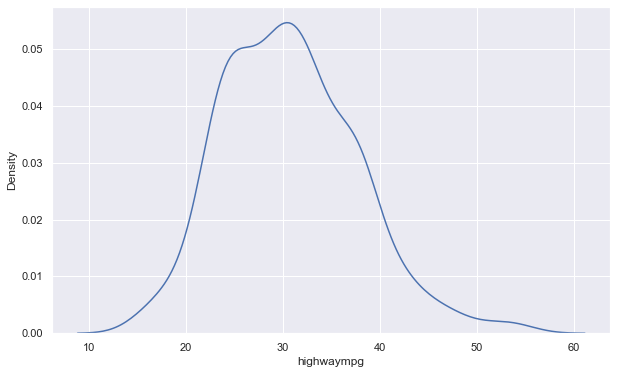

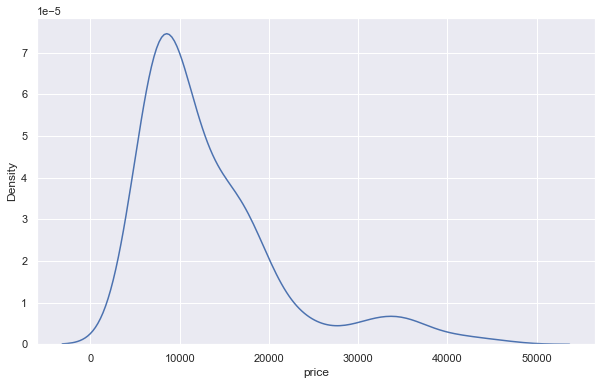

In [32]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(x=i,data=df)

In [33]:
df.skew()

symboling           0.211072
CarName            -0.258282
fueltype           -2.732619
aspiration          1.673832
doornumber          0.247552
carbody            -0.665301
drivewheel         -0.058352
enginelocation      8.143531
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginetype         -0.535603
cylindernumber      2.144253
enginesize          1.947655
fuelsystem         -0.242995
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [34]:
df1 = np.sqrt(df)

df1.head(15)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.732051,0.000000,1.0,0.0,1.0,0.000000,1.414214,0.0,9.412757,12.992305,...,11.401754,2.236068,1.862794,1.637071,3.000000,10.535654,70.710678,4.582576,5.196152,116.167982
1,1.732051,0.000000,1.0,0.0,1.0,0.000000,1.414214,0.0,9.412757,12.992305,...,11.401754,2.236068,1.862794,1.637071,3.000000,10.535654,70.710678,4.582576,5.196152,128.452326
2,1.000000,0.000000,1.0,0.0,1.0,1.414214,1.414214,0.0,9.721111,13.084342,...,12.328828,2.236068,1.637071,1.862794,3.000000,12.409674,70.710678,4.358899,5.099020,128.452326
3,1.414214,1.000000,1.0,0.0,0.0,1.732051,1.000000,0.0,9.989995,13.289093,...,10.440307,2.236068,1.786057,1.843909,3.162278,10.099505,74.161985,4.898979,5.477226,118.110118
4,1.414214,1.000000,1.0,0.0,0.0,1.732051,0.000000,0.0,9.969955,13.289093,...,11.661904,2.236068,1.786057,1.843909,2.828427,10.723805,74.161985,4.242641,4.690416,132.098448
5,1.414214,1.000000,1.0,0.0,1.0,1.732051,1.000000,0.0,9.989995,13.315405,...,11.661904,2.236068,1.786057,1.843909,2.915476,10.488088,74.161985,4.358899,5.000000,123.490890
6,1.000000,1.000000,1.0,0.0,0.0,1.732051,1.000000,0.0,10.285913,13.881643,...,11.661904,2.236068,1.786057,1.843909,2.915476,10.488088,74.161985,4.358899,5.000000,133.078924
7,1.000000,1.000000,1.0,0.0,0.0,2.000000,1.000000,0.0,10.285913,13.881643,...,11.661904,2.236068,1.786057,1.843909,2.915476,10.488088,74.161985,4.358899,5.000000,137.549991
8,1.000000,1.000000,1.0,1.0,0.0,1.732051,1.000000,0.0,10.285913,13.881643,...,11.445523,2.236068,1.769181,1.843909,2.880972,11.832160,74.161985,4.123106,4.472136,154.515371
9,0.000000,1.000000,1.0,1.0,1.0,1.414214,0.000000,0.0,9.974969,13.349157,...,11.445523,2.236068,1.769181,1.843909,2.645751,12.649111,74.161985,4.000000,4.690416,133.638194


In [35]:
df1.skew()


symboling          -0.136772
CarName            -0.888644
fueltype           -2.732619
aspiration          1.673832
doornumber          0.247552
carbody            -2.483079
drivewheel         -1.716906
enginelocation      8.143531
wheelbase           0.966772
carlength           0.055254
carwidth            0.859087
carheight           0.011167
curbweight          0.473846
enginetype         -2.619189
cylindernumber     -1.562349
enginesize          1.364372
fuelsystem         -0.722430
boreratio          -0.056920
stroke             -0.970015
compressionratio    2.505819
horsepower          0.899857
peakrpm            -0.064354
citympg             0.316761
highwaympg          0.208411
price               1.204620
dtype: float64

There is not much skewness present in the data.

### Outliers checking

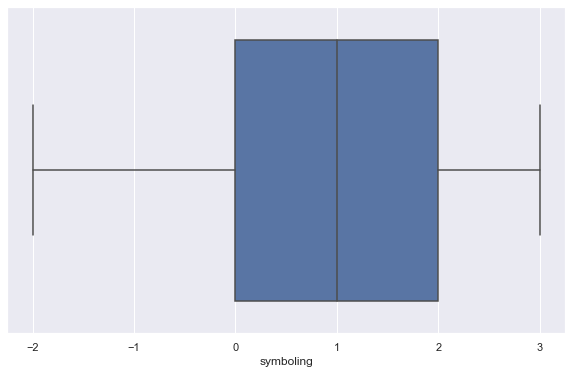

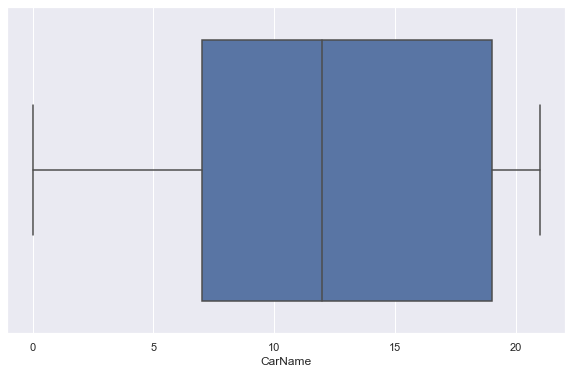

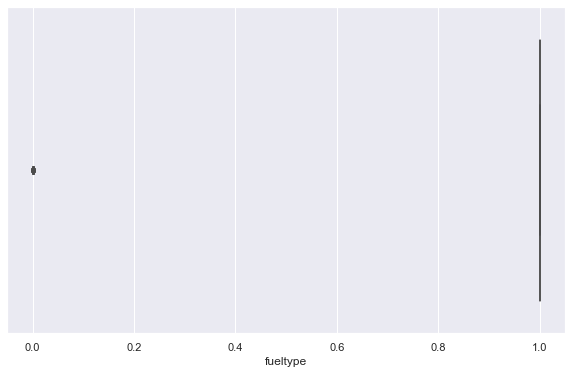

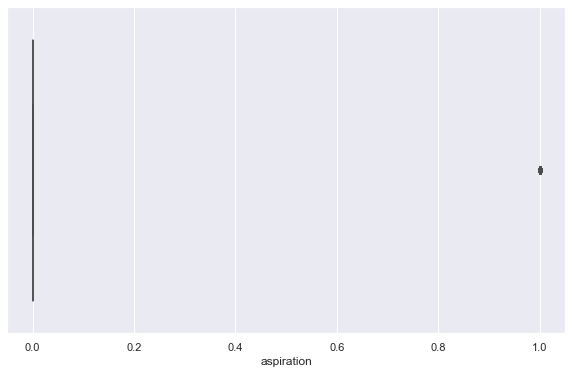

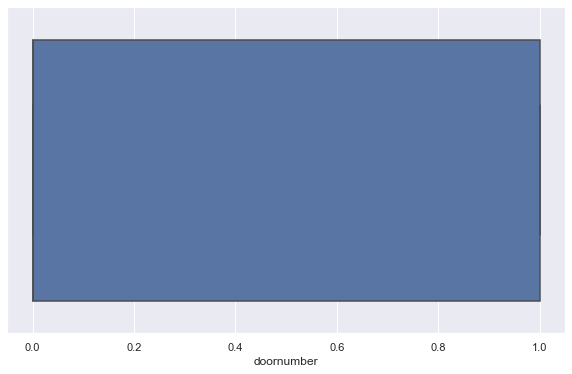

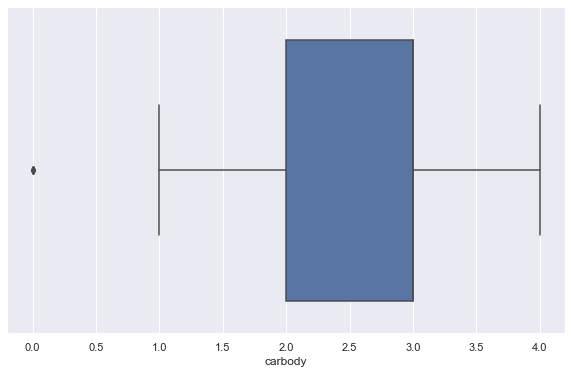

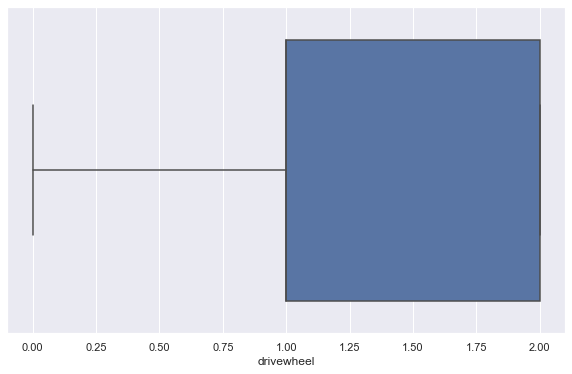

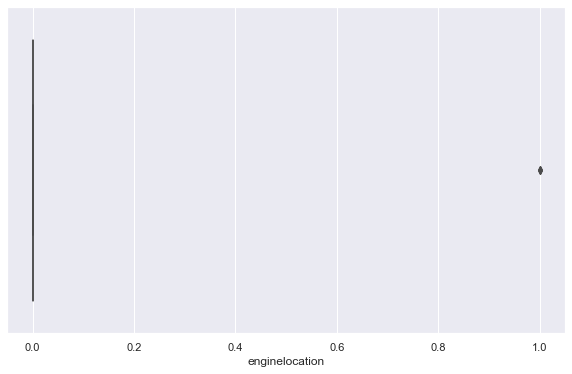

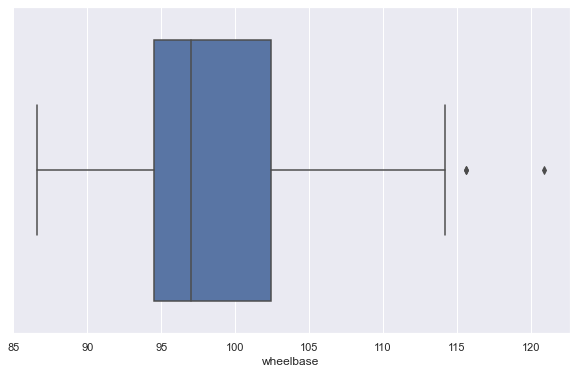

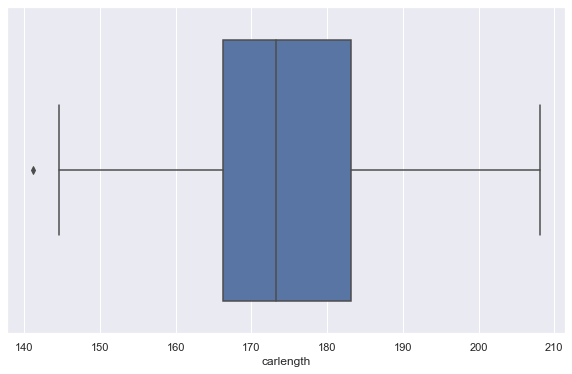

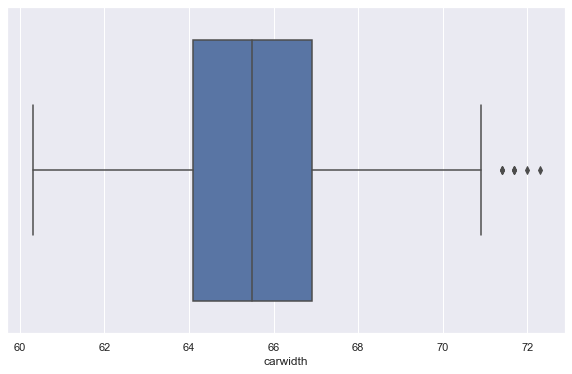

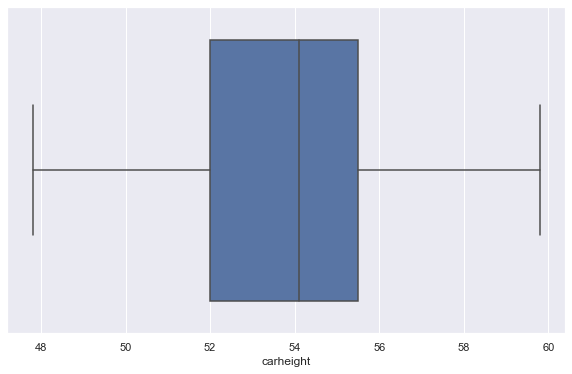

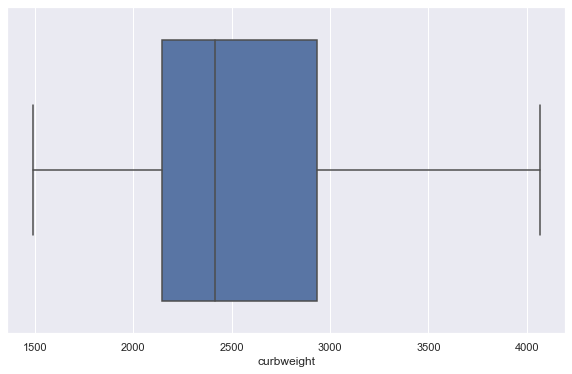

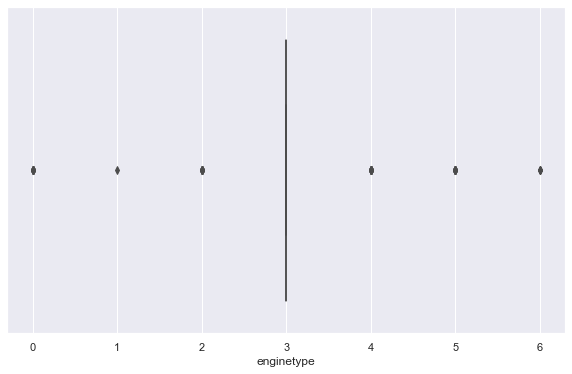

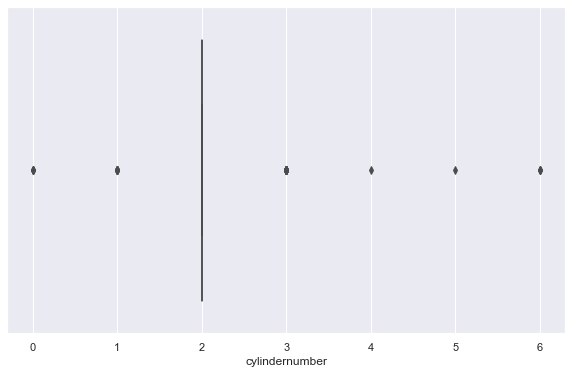

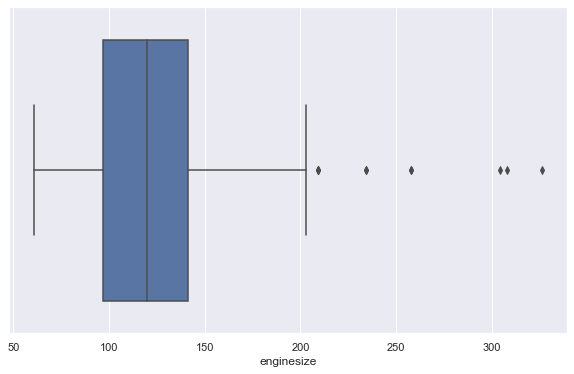

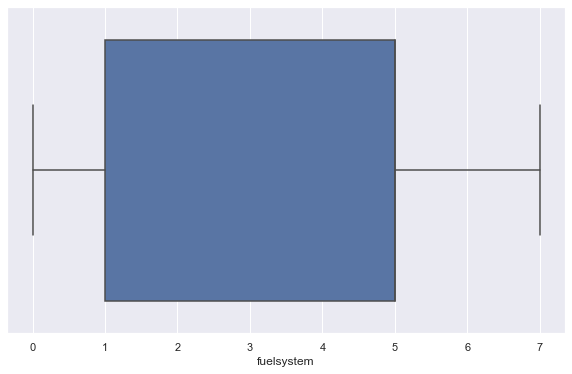

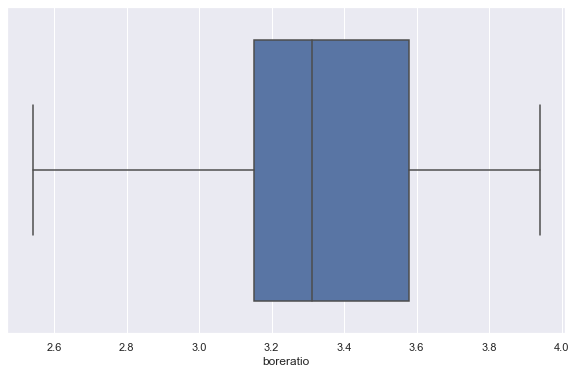

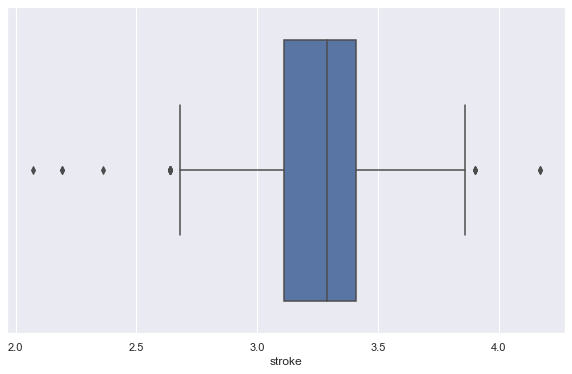

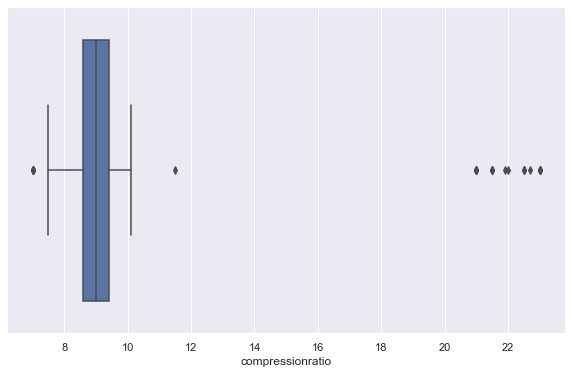

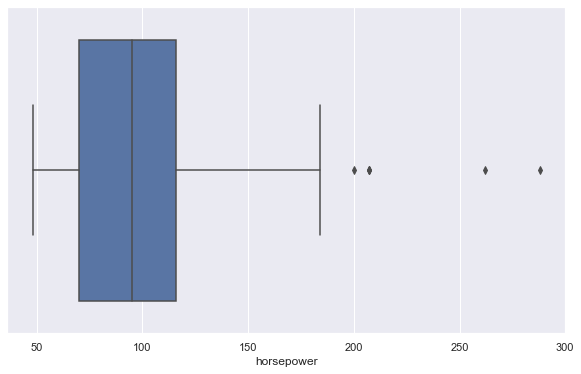

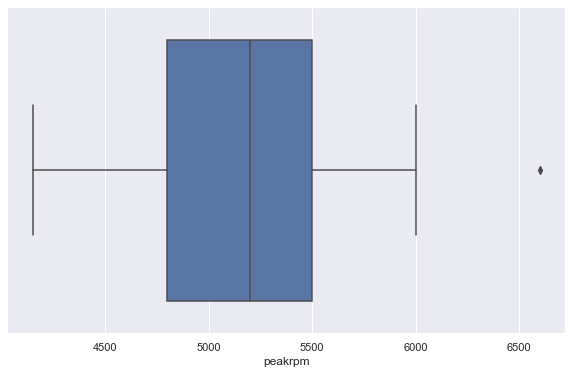

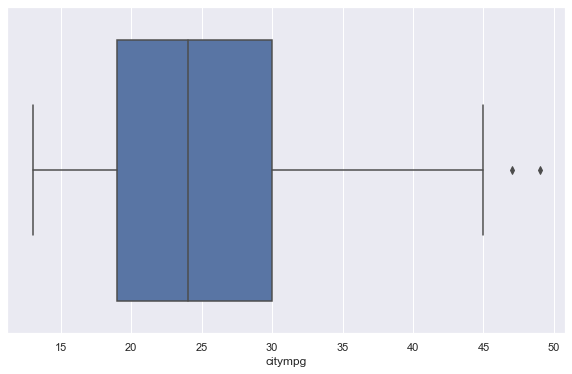

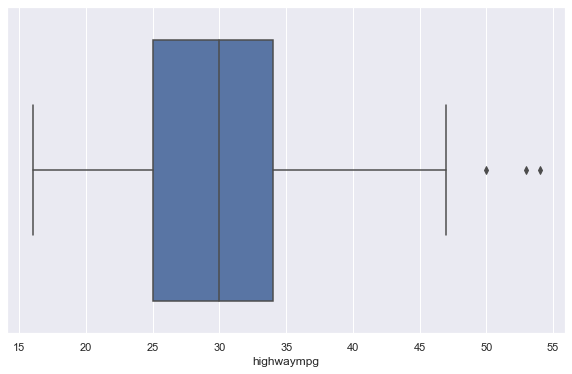

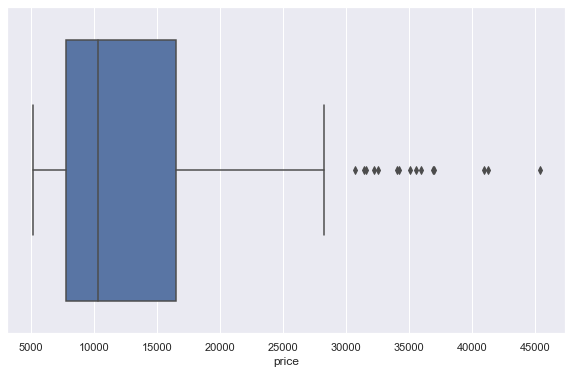

In [36]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.boxplot(x=i,data=df)

### Removing outliers

Z Score_Technique

In [37]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (205, 25)
[[1.74347043 1.94533239 0.32879797 ... 0.64655303 0.54605874 0.02739114]
 [1.74347043 1.94533239 0.32879797 ... 0.64655303 0.54605874 0.4044611 ]
 [0.133509   1.94533239 0.32879797 ... 0.95301169 0.69162706 0.4044611 ]
 ...
 [1.47645244 1.40319058 0.32879797 ... 1.10624102 1.12833203 1.02998314]
 [1.47645244 1.40319058 3.04138127 ... 0.11959362 0.54605874 1.15358178]
 [1.47645244 1.40319058 0.32879797 ... 0.95301169 0.83719538 1.17303131]]


In [38]:
threshold = 3
print(np.where(z > 3))

(array([  0,   1,  16,  18,  18,  30,  30,  47,  48,  49,  49,  49,  55,
        56,  57,  58,  63,  63,  66,  67,  68,  69,  70,  72,  73,  73,
        73,  74,  74,  90,  90, 108, 110, 111, 112, 113, 114, 116, 126,
       127, 128, 128, 129, 134, 158, 158, 159, 159, 165, 166, 172, 174,
       174, 182, 182, 184, 184, 187, 187, 189, 192, 192, 203, 203],
      dtype=int64), array([ 5,  5, 24, 22, 23, 22, 23, 15, 15, 14, 15, 20, 14, 14, 14, 14,  2,
       19,  2,  2,  2,  2,  2,  5,  8, 15, 24, 15, 24,  2, 22,  2,  2, 18,
        2, 18,  2,  2,  7,  7,  5,  7, 20, 18,  2, 19,  2, 19, 21, 21,  5,
        2, 19,  2, 19,  2, 19,  2, 19,  5,  2, 19,  2, 19], dtype=int64))


In [39]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(205, 25)
(159, 25)


### percentage data loss

In [40]:
loss_percent=(205-159)/205*100
print(loss_percent)

22.439024390243905


IF WE PERFORM OUTLIER REMOVEL THE DATA LOSS WILL BE HIGH SO NOT PREFORMING OUTLIER REMOVAL TECHNIQUE.Due to heavy loss of data we don't remove outliers

## 6.Feature Engineering

In [41]:
x= df.drop(columns='price')
y= df['price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,0,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [42]:
x.shape

(205, 24)

In [43]:
y.shape

(205,)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### Scaling

In [45]:
#data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#fit scaler on training data
norm = MinMaxScaler().fit(x_train)

#transform training data
x_train_norm = norm.transform(x_train)

#transform testing dataabs
x_test_norm = norm.transform(x_test)

In [46]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

# 7. Model Building and evaluation

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Finding best random state

In [48]:
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lm=LinearRegression(fit_intercept=True, normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)   

accurancy 0.8342307751732889 random_state 0
accurancy 0.8342307751732889 random_state 0
accurancy 0.8399244139178618 random_state 1
accurancy 0.8399244139178618 random_state 1
accurancy 0.8271319852045989 random_state 2
accurancy 0.8399244139178618 random_state 2
accurancy 0.8822701090785747 random_state 3
accurancy 0.8822701090785747 random_state 3
accurancy 0.8456852071341313 random_state 4
accurancy 0.8822701090785747 random_state 4
accurancy 0.9084219734588941 random_state 5
accurancy 0.9084219734588941 random_state 5
accurancy 0.8063072289265325 random_state 6
accurancy 0.9084219734588941 random_state 6
accurancy 0.8429650519565721 random_state 7
accurancy 0.9084219734588941 random_state 7
accurancy 0.8580520499396442 random_state 8
accurancy 0.9084219734588941 random_state 8
accurancy 0.9028256647436407 random_state 9
accurancy 0.9084219734588941 random_state 9
accurancy 0.7213524808340133 random_state 10
accurancy 0.9084219734588941 random_state 10
accurancy 0.7878364642290285 r

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=64)

### 1. LinearRegression

In [50]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.8840699669952775


In [51]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  1733.979960210512
Mean Squared Error:  5527842.348141847
Root Mean Squared Error:  2351.136395052794
Explained Variance Score:  0.9359805341227591
r2_score: 0.9343522831841258


#### C-V Score

In [52]:
ln_cv=cross_val_score(LR,x,y, cv = 4).mean()
ln_cv

0.5535228187994727

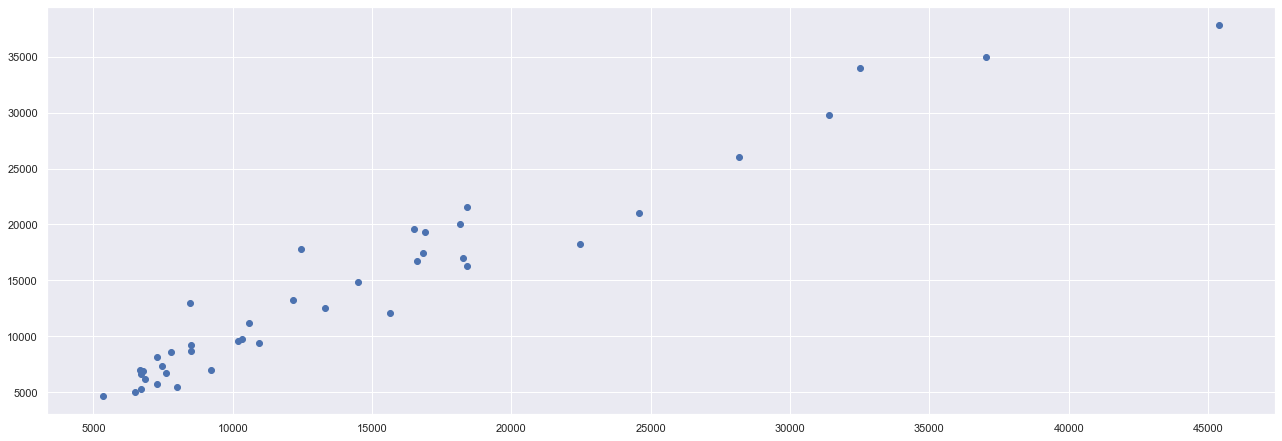

In [53]:
plt.scatter(y_test,LR_predict)

### a) Lasso-Rigid regression

In [54]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8840699669614824

In [55]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))

Mean Absolute Error:  1733.979960210512
Mean Squared Error:  5527842.348141847
Root Mean Squared Error:  2351.136395052794
Explained Variance Score:  0.9359805341227591


In [56]:
from sklearn.metrics import r2_score
print(r2_score(y_test,LR_predict))

0.9343522831841258


In [57]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [58]:
rd.score(x_train,y_train)

0.8840699461387205

In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,LR_predict))

0.9343522831841258


### 2.RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9883570999280364


In [61]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1472.175325307782
Mean Squared Error:  5104257.279880744
Root Mean Squared Error:  2259.2603391111757
Explained Variance Score:  0.9424166453143266
r2_score: 0.9393827075083624


#### C-V score

In [62]:
rfr_cv=cross_val_score(rf,x,y, cv = 4).mean()
rfr_cv

0.8000832230973141

### 3.DecisionTreeRegressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9987436507155357


In [64]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  2029.5121951219512
Mean Squared Error:  10022557.451219512
Root Mean Squared Error:  3165.8422972756416
Explained Variance Score:  0.8852303599023617
r2_score: 0.8809738100527311


### C-V score

In [65]:
DTR_cv=cross_val_score(DTR,x,y, cv = 4).mean()
DTR_cv

0.7660583839877771

### 4.GradientBoostingRegressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9930279426214009


In [67]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  1395.5777928821199
Mean Squared Error:  4098777.111999692
Root Mean Squared Error:  2024.543679943629
Explained Variance Score:  0.9516167326747185
r2_score: 0.9513236192001042


#### C-V score

In [68]:
gbr_cv=cross_val_score(GBR,x,y, cv = 4).mean()
gbr_cv

0.8277061980573579

### 5.Ridge

In [69]:
from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.8804389101619344


In [70]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  1903.3304963027817
Mean Squared Error:  6865867.2838947
Root Mean Squared Error:  2620.280001048495
Explained Variance Score:  0.9219207310060166
r2_score: 0.9184621263122664


#### C-V score

In [71]:
rd_cv=cross_val_score(R,x,y, cv = 4).mean()
rd_cv

0.6081087750680308

#### After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 2 best models choosen for hyper parameter tuning are
a. RandomForestRegressor

b.GradientBoostingRegressor

c.DecisionTreeRegressor



# 8.Hyper parametertuning

### a.RandomForestRegressor

In [72]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [73]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)


RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [74]:
RF_grid.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [75]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [76]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  1431.556624796748
Mean Squared Error:  4604678.617609132
Root Mean Squared Error:  2145.851490110425
Explained Variance Score:  0.9482206709349708
r2_score: 0.9453156188474645


### b.GradientBoostingRegressor

In [77]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [78]:
GBR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile']})

In [79]:
GBR.best_params_

{'criterion': 'mae', 'loss': 'ls'}

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mae',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [81]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  1438.6788688361353
Mean Squared Error:  4279877.390443767
Root Mean Squared Error:  2068.786453562515
Explained Variance Score:  0.9502537239573667
r2_score: 0.9491729030534021


#### C-V score

In [82]:
gbr_cv=cross_val_score(GBR,x,y, cv = 4).mean()
gbr_cv

0.8356698443974465

### c.DecisionTreeRegressor

In [83]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [84]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [85]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5}

In [86]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=12)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [87]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [88]:
print(DTR.score(x_train,y_train))

0.9977505534760984


In [89]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  2021.4634146341464
Mean Squared Error:  9355879.731707318
Root Mean Squared Error:  3058.738258123326
Explained Variance Score:  0.8945332588138514
r2_score: 0.888891161413647


#### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS GradientBoostingRegressor

In [90]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  1438.6788688361353
Mean Squared Error:  4279877.390443767
Root Mean Squared Error:  2068.786453562515
Explained Variance Score:  0.9502537239573667
r2_score: 0.9491729030534021


<AxesSubplot:xlabel='price', ylabel='Density'>

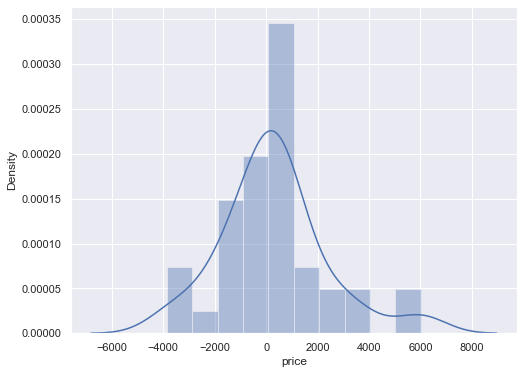

In [91]:
plt.figure(figsize=(8,6))
sns.distplot(y_test-GBR_final)

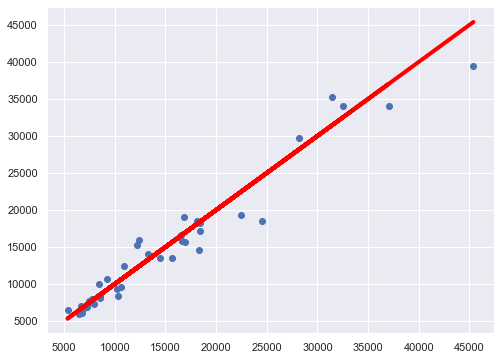

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,GBR_final)
plt.plot(y_test,y_test,linewidth=4,color='Red')

,Y Test,Prediction
74,45400.0,39439.583196
112,16900.0,15702.370613
42,10345.0,8363.367397
150,5348.0,6465.151537
55,10945.0,12386.588803


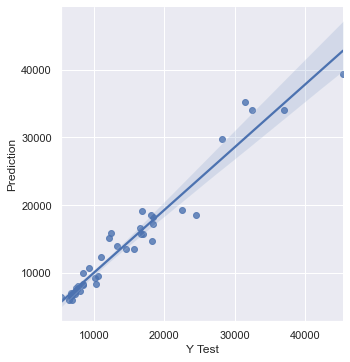

In [93]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':GBR_final},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# 9.SAVING THE MODEL

In [94]:
import joblib
joblib.dump(GBR_final,"final model.pkl")

['final model.pkl']